In [1]:
# Google Drive ÎßàÏö¥Ìä∏
from google.colab import drive
drive.mount('/content/drive')
print("‚úÖ Google Drive ÎßàÏö¥Ìä∏Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

Mounted at /content/drive
‚úÖ Google Drive ÎßàÏö¥Ìä∏Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [2]:
# ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
!pip install tifffile imagecodecs rasterio

# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏàòÏ†ï
import os
import glob
import numpy as np
import tifffile
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
import rasterio

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

print("‚úÖ ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 91.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22.3/22.3 MB 114.7 MB/s eta 0:00:00
‚úÖ ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [3]:
# ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
!pip install tifffile imagecodecs rasterio

# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏàòÏ†ï
import os
import glob
import numpy as np
import tifffile
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
import rasterio

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

print("‚úÖ ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

‚úÖ ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [4]:
import pandas as pd

GDRIVE_BASE_PATH = "/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset"

customers = pd.read_csv("/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/olist_customers_dataset.csv")
geolocation = pd.read_csv("/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/olist_geolocation_dataset.csv")
order_items = pd.read_csv("/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/olist_order_items_dataset.csv")
order_payments = pd.read_csv("/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/olist_order_reviews_dataset.csv")
orders = pd.read_csv("/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/olist_orders_dataset.csv")
products = pd.read_csv("/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/olist_products_dataset.csv")
sellers = pd.read_csv("/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/olist_sellers_dataset.csv")
category_name = pd.read_csv("/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/product_category_name_translation.csv")

In [5]:
customers_geo = customers.rename(
    columns={"customer_zip_code_prefix": "geolocation_zip_code_prefix"}
)


In [6]:
df_train = orders.merge(order_items, on='order_id', how='left')
df_train = df_train.merge(order_payments, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(order_reviews, on='order_id', how='outer')
df_train = df_train.merge(products, on='product_id', how='outer')
df_train = df_train.merge(customers_geo, on='customer_id', how='outer')
df_train = df_train.merge(sellers, on='seller_id', how='outer')
df_train = df_train.merge(geolocation, on='geolocation_zip_code_prefix', how='outer')
df_train = df_train.merge(category_name, on='product_category_name', how='outer')

df_train

order_id                       customer_id  \
0         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
1         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
2         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
3         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
4         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
...                                    ...                               ...   
18220817  9c2e92a11614b3b94ef257a4eb8540d7  158af3ad0742719d373724b762396918   
18220818  9c2e92a11614b3b94ef257a4eb8540d7  158af3ad0742719d373724b762396918   
18220819  9c2e92a11614b3b94ef257a4eb8540d7  158af3ad0742719d373724b762396918   
18220820  907057c26859398070400de963028855  f04c3f6e20a2a4318d97d7cec1d27bbf   
18220821  907057c26859398070400de963028855  f04c3f6e20a2a4318d97d7cec1d27bbf   

         order_status order_purchase_timestamp    order_approved_at  \
0           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
1           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
2           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
3           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
4           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
...               ...                      ...                  ...   
18220817  unavailable      2017-11-18 18:41:53  2017-11-18 18:55:27   
18220818  unavailable      2017-11-18 18:41:53  2017-11-18 18:55:27   
18220819  unavailable      2017-11-18 18:41:53  2017-11-18 18:55:27   
18220820      shipped      2017-08-21 15:01:40  2017-08-21 15:15:10   
18220821      shipped      2017-08-21 15:01:40  2017-08-21 15:15:10   

         order_delivered_carrier_date order_delivered_customer_date  \
0                 2018-02-08 00:53:09           2018-02-09 22:16:37   
1                 2018-02-08 00:53:09           2018-02-09 22:16:37   
2                 2018-02-08 00:53:09           2018-02-09 22:16:37   
3                 2018-02-08 00:53:09           2018-02-09 22:16:37   
4                 2018-02-08 00:53:09           2018-02-09 22:16:37   
...                               ...                           ...   
18220817                          NaN                           NaN   
18220818                          NaN                           NaN   
18220819                          NaN                           NaN   
18220820          2017-08-24 18:40:09                           NaN   
18220821          2017-08-24 18:40:09                           NaN   

         order_estimated_delivery_date  order_item_id  \
0                  2018-02-19 00:00:00            1.0   
1                  2018-02-19 00:00:00            1.0   
2                  2018-02-19 00:00:00            1.0   
3                  2018-02-19 00:00:00            1.0   
4                  2018-02-19 00:00:00            1.0   
...                                ...            ...   
18220817           2017-12-14 00:00:00            NaN   
18220818           2017-12-14 00:00:00            NaN   
18220819           2017-12-14 00:00:00            NaN   
18220820           2017-09-21 00:00:00            1.0   
18220821           2017-09-21 00:00:00            1.0   

                                product_id  ... customer_city customer_state  \
0         b5aebb467d9a92162173cbd234e00d99  ...     sao paulo             SP   
1         b5aebb467d9a92162173cbd234e00d99  ...     sao paulo             SP   
2         b5aebb467d9a92162173cbd234e00d99  ...     sao paulo             SP   
3         b5aebb467d9a92162173cbd234e00d99  ...     sao paulo             SP   
4         b5aebb467d9a92162173cbd234e00d99  ...     sao paulo             SP   
...                                    ...  ...           ...            ...   
18220817                               NaN  ...       charrua             RS   
18220818                               NaN

In [7]:
df_train.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'geolocation_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state

In [9]:
pgina = pd.read_csv('/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/State of Data 2021 - Dataset - Pgina1.csv')

pgina

id   age age_category        sex  \
0     qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s  38.0        35-39  Masculino   
1     zdl2n19yhgpnoaco6kkczdl2nwv9zwrt  39.0        35-39  Masculino   
2     vsamqp2un3q7us84mgvsams5fulsmcoh  30.0        30-34  Masculino   
3     v31ab41botodnsv31zgg4k34zzojy81l  38.0        35-39   Feminino   
4     ubhu8ntvm4xc0sfkdubhu80e973eek0k  36.0        35-39  Masculino   
...                                ...   ...          ...        ...   
2640  07nvo8cdy377a46gon207nvjebwe65zg  40.0        40-44  Masculino   
2641  01mqnby32u01pg3nuj6vipp4mc06s8pg  27.0        25-29  Masculino   
2642  01fncs8qbhl9zx01fncs8rqib2zl3d18  24.0        22-24  Masculino   
2643  075h3v2z19if04yn7o075h3vhifl38rw  38.0        35-39  Masculino   
2644  037usz1h2yip96dgil4mhj037uszw1gk  27.0        25-29   Feminino   

                live_spec region region_part                       learn  \
0              Cear? (CE)     CE    Nordeste               P?s-gradua??o   
1              Bahia (BA)     BA    Nordeste               P?s-gradua??o   
2     Santa Catarina (SC)     SC         Sul               P?s-gradua??o   
3          S?o Paulo (SP)     SP     Sudeste               P?s-gradua??o   
4     Santa Catarina (SC)     SC         Sul               P?s-gradua??o   
...                   ...    ...         ...                         ...   
2640       S?o Paulo (SP)     SP     Sudeste  N?o tenho gradua??o formal   
2641  Santa Catarina (SC)     SC         Sul       Gradua??o/Bacharelado   
2642  Santa Catarina (SC)     SC         Sul       Gradua??o/Bacharelado   
2643  Rio de Janeiro (RJ)     RJ     Sudeste       Gradua??o/Bacharelado   
2644    Minas Gerais (MG)     MG     Sudeste               P?s-gradua??o   

                                                  major  \
0                                      Qu?mica / F?sica   
1     Economia/ Administra??o / Contabilidade / Fina...   
2     Computa??o / Engenharia de Software / Sistemas...   
3                                                Outras   
4                                    Outras Engenharias   
...                                                 ...   
2640                                                NaN   
2641  Estat?stica/ Matem?tica / Matem?tica Computaci...   
2642  Computa??o / Engenharia de Software / Sistemas...   
2643  Computa??o / Engenharia de Software / Sistemas...   
2644                                             Outras   

                                   emp_state                         ind_sec  \
0                            Empregado (CLT)                       Marketing   
1           Empreendedor ou Empregado (CNPJ)                     Consultoria   
2                            Empregado (CLT)                       Ind?stria   
3           Empreendedor ou Empregado (CNPJ)                        Servi?os   
4           Empreendedor ou Empregado (CNPJ)                          Varejo   
...                                      ...                             ...   
2640  Trabalho na ?rea Acad?mica/Pesquisador                             NaN   
2641                         Empregado (CLT)  Tecnologia/F?brica de Software   
2642                         Empregado (CLT)  Tecnologia/F?brica de Software   
2643      Desempregado, buscando recoloca??o                             NaN   
2644      Desempregado, buscando recoloca??o                             NaN   

            n_of_emp  manag_stat                                       role  \
0       de 101 a 500         1.0                     Supervisor/Coordenador   
1           de 1 a 5         1.0  S?cio ou C-level (CEO, CDO, CIO, CTO etc)   
2     de 1001 a 3000         1.0                     Supervisor/Coordenador   
3     de 1001 a 3000         1.0                    Gerente/Head/Diretor/VP   
4          de 6 a 10         1.0                    Gerente/Head/Diretor/VP   
...              ...         ...                                        ...   
2640             NaN         NaN   

In [13]:
pgina.columns

Index(['id', 'age', 'age_category', 'sex', 'live_spec', 'region',
       'region_part', 'learn', 'major', 'emp_state', 'ind_sec', 'n_of_emp',
       'manag_stat', 'role', 'current_role', 'salary_range',
       'remote_work_flex', 'work_model'],
      dtype='object')

In [15]:
import re
import numpy as np
import pandas as pd

# -----------------------------------
# Config
# -----------------------------------
FILE_PATH = '/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/State of Data 2021 - Dataset - Pgina1.csv' # ÏàòÏ†ï Í∞ÄÎä•
OUTPUT_PATH = '/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/processed_data.csv'         # ÏàòÏ†ï Í∞ÄÎä•
SAL_COL = "salary_range"                                           # ÏõêÎ≥∏ Ïª¨ÎüºÎ™Ö

# -----------------------------------
def _ptbr_num_to_float(s: str) -> float:
    """'40.001' -> 40001.0, '1.500,75' -> 1500.75"""
    s = s.replace(".", "").replace(",", ".")
    try:
        return float(s)
    except Exception:
        return np.nan

def parse_salary_range(text: str):
    """
    text ÏòàÏãú:
      - 'de R$ 4.001/m√™s a R$ 6.000/m√™s'
      - 'Menos de R$ 1.000/m√™s'
      - 'Acima de R$ 40.001/m√™s'
      - Ïù∏ÏΩîÎî© Î≥ÄÌòï: 'm?s' Îì±ÏùÄ Î¨¥Ïãú
    return: (min_val, max_val, mid_val)
    """
    if not isinstance(text, str) or not text.strip():
        return (np.nan, np.nan, np.nan)

    # Ïù∏ÏΩîÎî© Î≥ÄÌòï Îã®Ïñ¥ Ï†úÍ±∞ (m√™s/m?s Îì± Ïõî ÌëúÍ∏∞, Í≥µÎ∞± Ï†ïÎ¶¨)
    t = re.sub(r"m[\S]*", "", text, flags=re.IGNORECASE)  # 'm√™s', 'm?s' Îì± Ï†úÍ±∞
    t = re.sub(r"\s+", " ", t).strip()

    # Î≤îÏúÑ: de R$ X a R$ Y
    m_range = re.search(r"de\s*R\$\s*([\d\.,]+)\s*a\s*R\$\s*([\d\.,]+)", t, flags=re.IGNORECASE)
    if m_range:
        lo = _ptbr_num_to_float(m_range.group(1))
        hi = _ptbr_num_to_float(m_range.group(2))
        mid = np.nanmean([lo, hi])
        return (lo, hi, mid)

    # ÏÉÅÌïúÎßå ÏûàÎäî Í≤ΩÏö∞: Menos de R$ X
    m_less = re.search(r"Menos\s+de\s*R\$\s*([\d\.,]+)", t, flags=re.IGNORECASE)
    if m_less:
        hi = _ptbr_num_to_float(m_less.group(1))
        lo = 0.0
        mid = np.nanmean([lo, hi])
        return (lo, hi, mid)

    # ÌïòÌïúÎßå ÏûàÎäî Í≤ΩÏö∞: Acima de R$ X
    m_above = re.search(r"Acima\s+de\s*R\$\s*([\d\.,]+)", t, flags=re.IGNORECASE)
    if m_above:
        lo = _ptbr_num_to_float(m_above.group(1))
        hi = np.nan  # ÏÉÅÌïú Î∂àÎ™Ö
        mid = lo     # Î≥¥ÏàòÏ†ÅÏúºÎ°ú ÌïòÌïú ÏÇ¨Ïö©
        return (lo, hi, mid)

    # Ïà´Ïûê ÌïòÎÇòÎßå ÏûàÎäî Í≤ΩÏö∞ ÎåÄÎπÑ (fallback)
    m_one = re.search(r"R\$\s*([\d\.,]+)", t, flags=re.IGNORECASE)
    if m_one:
        v = _ptbr_num_to_float(m_one.group(1))
        return (v, v, v)

    return (np.nan, np.nan, np.nan)

def assign_income_class(mid_val: float) -> str:
    """
    ÏûÑÏùò ÌÅ¥ÎûòÏä§ Í∏∞Ï§Ä (ÏõîÏÜåÎìù, BRL):
        E: ‚â§ 2k
        D: 2k ~ 4k
        C: 4k ~ 10k
        B: 10k ~ 20k
        A: > 20k
    """
    if pd.isna(mid_val):
        return np.nan
    if mid_val <= 2000:
        return "E (‚â§2k)"
    if mid_val <= 4000:
        return "D (2k‚Äì4k)"
    if mid_val <= 10000:
        return "C (4k‚Äì10k)"
    if mid_val <= 20000:
        return "B (10k‚Äì20k)"
    return "A (>20k)"

# -----------------------------------
# Load
# -----------------------------------
df = pd.read_csv(FILE_PATH)

# -----------------------------------
# Transform
# -----------------------------------
sal_parsed = df[SAL_COL].apply(parse_salary_range)
df["salary_min_brl"] = sal_parsed.apply(lambda x: x[0])
df["salary_max_brl"] = sal_parsed.apply(lambda x: x[1])
df["salary_mid_brl"] = sal_parsed.apply(lambda x: x[2])

df["income_class"] = df["salary_mid_brl"].apply(assign_income_class)

# (ÏÑ†ÌÉù) Î≤îÏ£º ÏàúÏÑú ÏßÄÏ†ï
cat_order = ["E (‚â§2k)", "D (2k‚Äì4k)", "C (4k‚Äì10k)", "B (10k‚Äì20k)", "A (>20k)"]
df["income_class"] = pd.Categorical(df["income_class"], categories=cat_order, ordered=True)

# -----------------------------------
# Save
# -----------------------------------
df.to_csv(OUTPUT_PATH, index=False)
print("Saved:", OUTPUT_PATH)

# (ÏÑ†ÌÉù) Í≤∞Í≥º ÏöîÏïΩ ÌôïÏù∏
print(df[["salary_range", "salary_min_brl", "salary_max_brl", "salary_mid_brl", "income_class"]].head(12))

Saved: /content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/processed_data.csv
                        salary_range  salary_min_brl  salary_max_brl  \
0     de R$ 4.001/m?s a R$ 6.000/m?s          4001.0          4001.0   
1     de R$ 6.001/m?s a R$ 8.000/m?s          6001.0          6001.0   
2    de R$ 8.001/m?s a R$ 12.000/m?s          8001.0          8001.0   
3   de R$ 12.001/m?s a R$ 16.000/m?s         12001.0         12001.0   
4    de R$ 8.001/m?s a R$ 12.000/m?s          8001.0          8001.0   
5    de R$ 8.001/m?s a R$ 12.000/m?s          8001.0          8001.0   
6     de R$ 3.001/m?s a R$ 4.000/m?s          3001.0          3001.0   
7   de R$ 12.001/m?s a R$ 16.000/m?s         12001.0         12001.0   
8     de R$ 4.001/m?s a R$ 6.000/m?s          4001.0          4001.0   
9     de R$ 4.001/m?s a R$ 6.000/m?s          4001.0          4001.0   
10  de R$ 30.001/m?s a R$ 40.000/m?s         30001.0         30001.0   
11    de R$ 6.001/m?s a R$ 8.000/m?s       

In [18]:
import re
import numpy as np
import pandas as pd

def _ptbr_num_to_float(s: str) -> float:
    s = s.replace(".", "").replace(",", ".")
    try:
        return float(s)
    except Exception:
        return np.nan

def parse_salary_range(text: str):
    """
    text ÏòàÏãú:
      - 'de R$ 4.001/m√™s a R$ 6.000/m√™s'
      - 'Menos de R$ 1.000/m√™s'
      - 'Acima de R$ 40.001/m√™s'
      - Ïù∏ÏΩîÎî© Î≥ÄÌòï: 'm?s' Îì±
    return: (min_val, max_val, mid_val)
    """
    if not isinstance(text, str) or not text.strip():
        return (np.nan, np.nan, np.nan)

    t = text.strip()

    # 1) '/m√™s', '/m?s' Í∞ôÏùÄ Ïõî ÌëúÍ∏∞Îßå Ï†úÍ±∞ (Î¨∏Ïû• ÎÇòÎ®∏ÏßÄÎäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ)
    t = re.sub(r"/m(?:√™|e|\?)s", "", t, flags=re.IGNORECASE)

    # 2) Í≥µÎ∞± Ï†ïÎ¶¨
    t = re.sub(r"\s+", " ", t).strip()

    # 3) Î≤îÏúÑ: de R$ X a R$ Y
    m_range = re.search(r"de\s*R\$\s*([\d\.,]+)\s*a\s*R\$\s*([\d\.,]+)", t, flags=re.IGNORECASE)
    if m_range:
        lo = _ptbr_num_to_float(m_range.group(1))
        hi = _ptbr_num_to_float(m_range.group(2))
        mid = np.nanmean([lo, hi])
        return (lo, hi, mid)

    # 4) ÏÉÅÌïúÎßå: Menos de R$ X
    m_less = re.search(r"Menos\s+de\s*R\$\s*([\d\.,]+)", t, flags=re.IGNORECASE)
    if m_less:
        hi = _ptbr_num_to_float(m_less.group(1))
        lo = 0.0
        mid = np.nanmean([lo, hi])
        return (lo, hi, mid)

    # 5) ÌïòÌïúÎßå: Acima de R$ X
    m_above = re.search(r"Acima\s+de\s*R\$\s*([\d\.,]+)", t, flags=re.IGNORECASE)
    if m_above:
        lo = _ptbr_num_to_float(m_above.group(1))
        hi = np.nan
        mid = lo
        return (lo, hi, mid)

    # 6) Ïà´Ïûê ÌïòÎÇòÎßå ÏûàÎäî Í≤ΩÏö∞
    m_one = re.search(r"R\$\s*([\d\.,]+)", t, flags=re.IGNORECASE)
    if m_one:
        v = _ptbr_num_to_float(m_one.group(1))
        return (v, v, v)

    return (np.nan, np.nan, np.nan)

# ----- Ï†ÅÏö© ÏòàÏãú -----
# df = pd.read_csv("/mnt/data/State of Data 2021 - Dataset - Pgina1.csv")
sal_parsed = df["salary_range"].apply(parse_salary_range)
df["salary_min_brl"] = sal_parsed.apply(lambda x: x[0])
df["salary_max_brl"] = sal_parsed.apply(lambda x: x[1])
df["salary_mid_brl"] = sal_parsed.apply(lambda x: x[2])


In [19]:
df

id   age age_category        sex  \
0     qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s  38.0        35-39  Masculino   
1     zdl2n19yhgpnoaco6kkczdl2nwv9zwrt  39.0        35-39  Masculino   
2     vsamqp2un3q7us84mgvsams5fulsmcoh  30.0        30-34  Masculino   
3     v31ab41botodnsv31zgg4k34zzojy81l  38.0        35-39   Feminino   
4     ubhu8ntvm4xc0sfkdubhu80e973eek0k  36.0        35-39  Masculino   
...                                ...   ...          ...        ...   
2640  07nvo8cdy377a46gon207nvjebwe65zg  40.0        40-44  Masculino   
2641  01mqnby32u01pg3nuj6vipp4mc06s8pg  27.0        25-29  Masculino   
2642  01fncs8qbhl9zx01fncs8rqib2zl3d18  24.0        22-24  Masculino   
2643  075h3v2z19if04yn7o075h3vhifl38rw  38.0        35-39  Masculino   
2644  037usz1h2yip96dgil4mhj037uszw1gk  27.0        25-29   Feminino   

                live_spec region region_part                       learn  \
0              Cear? (CE)     CE    Nordeste               P?s-gradua??o   
1              Bahia (BA)     BA    Nordeste               P?s-gradua??o   
2     Santa Catarina (SC)     SC         Sul               P?s-gradua??o   
3          S?o Paulo (SP)     SP     Sudeste               P?s-gradua??o   
4     Santa Catarina (SC)     SC         Sul               P?s-gradua??o   
...                   ...    ...         ...                         ...   
2640       S?o Paulo (SP)     SP     Sudeste  N?o tenho gradua??o formal   
2641  Santa Catarina (SC)     SC         Sul       Gradua??o/Bacharelado   
2642  Santa Catarina (SC)     SC         Sul       Gradua??o/Bacharelado   
2643  Rio de Janeiro (RJ)     RJ     Sudeste       Gradua??o/Bacharelado   
2644    Minas Gerais (MG)     MG     Sudeste               P?s-gradua??o   

                                                  major  \
0                                      Qu?mica / F?sica   
1     Economia/ Administra??o / Contabilidade / Fina...   
2     Computa??o / Engenharia de Software / Sistemas...   
3                                                Outras   
4                                    Outras Engenharias   
...                                                 ...   
2640                                                NaN   
2641  Estat?stica/ Matem?tica / Matem?tica Computaci...   
2642  Computa??o / Engenharia de Software / Sistemas...   
2643  Computa??o / Engenharia de Software / Sistemas...   
2644                                             Outras   

                                   emp_state  ... manag_stat  \
0                            Empregado (CLT)  ...        1.0   
1           Empreendedor ou Empregado (CNPJ)  ...        1.0   
2                            Empregado (CLT)  ...        1.0   
3           Empreendedor ou Empregado (CNPJ)  ...        1.0   
4           Empreendedor ou Empregado (CNPJ)  ...        1.0   
...                                      ...  ...        ...   
2640  Trabalho na ?rea Acad?mica/Pesquisador  ...        NaN   
2641                         Empregado (CLT)  ...        0.0   
2642                         Empregado (CLT)  ...        0.0   
2643      Desempregado, buscando recoloca??o  ...        NaN   
2644      Desempregado, buscando recoloca??o  ...        NaN   

                                           role  \
0                        Supervisor/Coordenador   
1     S?cio ou C-level (CEO, CDO, CIO, CTO etc)   
2                        Supervisor/Coordenador   
3                       Gerente/Head/Diretor/VP   
4                       Gerente/Head/Diretor/VP   
...                                         ...   
2640                                        NaN   
2641                                        NaN   
2642                                        NaN   
2643                                        NaN   
2644                                        NaN   

                           current_role                      salary_range  \
0                                   NaN    de R$ 4.001/m?s a R$ 6.000/m?s   
1            

In [20]:
df.columns

Index(['id', 'age', 'age_category', 'sex', 'live_spec', 'region',
       'region_part', 'learn', 'major', 'emp_state', 'ind_sec', 'n_of_emp',
       'manag_stat', 'role', 'current_role', 'salary_range',
       'remote_work_flex', 'work_model', 'salary_min_brl', 'salary_max_brl',
       'salary_mid_brl', 'income_class'],
      dtype='object')

In [24]:
state_income = df[['age', 'age_category', 'sex', 'region','region_part', 'income_class']]

state_income

age age_category        sex region region_part income_class
0     38.0        35-39  Masculino     CE    Nordeste   C (4k‚Äì10k)
1     39.0        35-39  Masculino     BA    Nordeste   C (4k‚Äì10k)
2     30.0        30-34  Masculino     SC         Sul   C (4k‚Äì10k)
3     38.0        35-39   Feminino     SP     Sudeste  B (10k‚Äì20k)
4     36.0        35-39  Masculino     SC         Sul   C (4k‚Äì10k)
...    ...          ...        ...    ...         ...          ...
2640  40.0        40-44  Masculino     SP     Sudeste          NaN
2641  27.0        25-29  Masculino     SC         Sul   C (4k‚Äì10k)
2642  24.0        22-24  Masculino     SC         Sul   C (4k‚Äì10k)
2643  38.0        35-39  Masculino     RJ     Sudeste          NaN
2644  27.0        25-29   Feminino     MG     Sudeste          NaN

[2645 rows x 6 columns]

In [26]:
# 1) income_class ‚Üí Ï†êÏàò(ÏÑúÏó¥) Îß§Ìïë
#    E(‚â§2k)=1, D(2k‚Äì4k)=2, C(4k‚Äì10k)=3, B(10k‚Äì20k)=4, A(>20k)=5
class_to_score = {
    "E (‚â§2k)": 1,
    "D (2k‚Äì4k)": 2,
    "C (4k‚Äì10k)": 3,
    "B (10k‚Äì20k)": 4,
    "A (>20k)": 5,
}
state_income["income_class_score"] = state_income["income_class"].map(class_to_score).astype("float")

# 2) regionÎ≥Ñ ÌèâÍ∑† income class Í≥ÑÏÇ∞ (Í≤∞Ï∏° Ï†úÏô∏ ÌèâÍ∑†)
region_avg_income_class = (
    state_income
    .groupby("region", dropna=False, as_index=False)
    .agg(
        avg_income_class_score=("income_class_score", "mean"),
        n=("income_class_score", "count"),
        # ÏÑ†ÌÉù: ÌëúÏ§ÄÌé∏Ï∞®/ÌëúÏ§ÄÏò§Ï∞®
        std=("income_class_score", "std")
    )
)

# 3) (ÏÑ†ÌÉù) ÏÜåÏàòÏ†ê ÏûêÎ¶øÏàò Ï†ïÎ¶¨
region_avg_income_class["avg_income_class_score"] = region_avg_income_class["avg_income_class_score"].round(3)
region_avg_income_class["std"] = region_avg_income_class["std"].round(3)

# Í≤∞Í≥º ÌôïÏù∏
region_avg_income_class

/tmp/ipython-input-3015291322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_income["income_class_score"] = state_income["income_class"].map(class_to_score).astype("float")


region  avg_income_class_score    n    std
0         AL                   3.273   11  0.647
1         BA                   2.755   49  0.990
2         CE                   2.772   57  0.964
3         DF                   3.264   91  1.031
4         ES                   2.800   30  1.031
5   Exterior                   3.902   41  1.091
6         GO                   3.038   53  0.940
7         MA                   2.333    9  1.118
8         MG                   2.856  319  0.893
9         MS                   2.833   12  0.718
10        MT                   3.125   16  0.957
11        PB                   2.429   28  0.920
12        PE                   2.932   44  0.846
13        PI                   2.333    9  1.000
14        PR                   3.037  136  0.881
15        RJ                   2.947  188  0.857
16        RN                   2.667   15  0.816
17        RS                   2.909  121  0.866
18        SC                   2.964  110  0.765
19        SE                   2.722   18  1.074
20        SP                   3.149  982  0.944
21       NaN                   2.731   26  1.041

In [27]:
region_avg_income_class = (
    region_avg_income_class
    .loc[~region_avg_income_class["region"].isin(["Exterior"])]
    .dropna(subset=["region"])
    .reset_index(drop=True)
)

region_avg_income_class

region  avg_income_class_score    n    std
0      AL                   3.273   11  0.647
1      BA                   2.755   49  0.990
2      CE                   2.772   57  0.964
3      DF                   3.264   91  1.031
4      ES                   2.800   30  1.031
5      GO                   3.038   53  0.940
6      MA                   2.333    9  1.118
7      MG                   2.856  319  0.893
8      MS                   2.833   12  0.718
9      MT                   3.125   16  0.957
10     PB                   2.429   28  0.920
11     PE                   2.932   44  0.846
12     PI                   2.333    9  1.000
13     PR                   3.037  136  0.881
14     RJ                   2.947  188  0.857
15     RN                   2.667   15  0.816
16     RS                   2.909  121  0.866
17     SC                   2.964  110  0.765
18     SE                   2.722   18  1.074
19     SP                   3.149  982  0.944

In [30]:
geolocation['geolocation_state'].unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [32]:
# ÌèâÍ∑† Ï†êÏàòÏùò Î∂ÑÌè¨Î•º Í∏∞Ï§ÄÏúºÎ°ú 4Îì±Í∏â(A~D)Î°ú ÎÇòÎàî
q = region_avg_income_class['avg_income_class_score'].quantile([0.25, 0.5, 0.75])
bins = [-float('inf'), q.loc[0.25], q.loc[0.5], q.loc[0.75], float('inf')]
labels = ['D', 'C', 'B', 'A']  # ÏÉÅÏúÑ Íµ¨Í∞ÑÏù¥ A

region_avg_income_class['income_class_AD'] = pd.cut(
    region_avg_income_class['avg_income_class_score'],
    bins=bins, labels=labels, include_lowest=True
)

region_avg_income_class

region  avg_income_class_score    n    std income_class_AD
0      AL                   3.273   11  0.647               A
1      BA                   2.755   49  0.990               C
2      CE                   2.772   57  0.964               C
3      DF                   3.264   91  1.031               A
4      ES                   2.800   30  1.031               C
5      GO                   3.038   53  0.940               A
6      MA                   2.333    9  1.118               D
7      MG                   2.856  319  0.893               C
8      MS                   2.833   12  0.718               C
9      MT                   3.125   16  0.957               A
10     PB                   2.429   28  0.920               D
11     PE                   2.932   44  0.846               B
12     PI                   2.333    9  1.000               D
13     PR                   3.037  136  0.881               B
14     RJ                   2.947  188  0.857               B
15     RN                   2.667   15  0.816               D
16     RS                   2.909  121  0.866               B
17     SC                   2.964  110  0.765               B
18     SE                   2.722   18  1.074               D
19     SP                   3.149  982  0.944               A

In [34]:
region_avg_income_class = (
    region_avg_income_class
      .rename(columns={"region": "geolocation_state"})
)

region_avg_income_class

geolocation_state  avg_income_class_score    n    std income_class_AD
0                 AL                   3.273   11  0.647               A
1                 BA                   2.755   49  0.990               C
2                 CE                   2.772   57  0.964               C
3                 DF                   3.264   91  1.031               A
4                 ES                   2.800   30  1.031               C
5                 GO                   3.038   53  0.940               A
6                 MA                   2.333    9  1.118               D
7                 MG                   2.856  319  0.893               C
8                 MS                   2.833   12  0.718               C
9                 MT                   3.125   16  0.957               A
10                PB                   2.429   28  0.920               D
11                PE                   2.932   44  0.846               B
12                PI                   2.333    9  1.000               D
13                PR                   3.037  136  0.881               B
14                RJ                   2.947  188  0.857               B
15                RN                   2.667   15  0.816               D
16                RS                   2.909  121  0.866               B
17                SC                   2.964  110  0.765               B
18                SE                   2.722   18  1.074               D
19                SP                   3.149  982  0.944               A

In [40]:
geo_income = pd.merge(region_avg_income_class, geolocation, on='geolocation_state', how='inner')

geo_income

geolocation_state  avg_income_class_score    n    std income_class_AD  \
0                     AL                   3.273   11  0.647               A   
1                     AL                   3.273   11  0.647               A   
2                     AL                   3.273   11  0.647               A   
3                     AL                   3.273   11  0.647               A   
4                     AL                   3.273   11  0.647               A   
...                  ...                     ...  ...    ...             ...   
977019                SP                   3.149  982  0.944               A   
977020                SP                   3.149  982  0.944               A   
977021                SP                   3.149  982  0.944               A   
977022                SP                   3.149  982  0.944               A   
977023                SP                   3.149  982  0.944               A   

        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                             57060        -9.590207       -35.766997   
1                             57073        -9.563074       -35.771200   
2                             57020        -9.536068       -35.751404   
3                             57061        -9.577033       -35.771855   
4                             57038        -9.632971       -35.696970   
...                             ...              ...              ...   
977019                        19970       -22.779062       -50.218287   
977020                        19905       -22.997601       -49.885928   
977021                        19907       -22.978498       -49.875919   
977022                        19905       -22.993127       -49.887665   
977023                        19911       -22.972685       -49.864647   

       geolocation_city  
0                maceio  
1                maceio  
2                maceio  
3                maceio  
4                maceio  
...                 ...  
977019         palmital  
977020         ourinhos  
977021         ourinhos  
977022         ourinhos  
977023         ourinhos  

[977024 rows x 9 columns]

In [41]:
geo_income = geo_income.drop(columns=['n', 'std'])

geo_income

geolocation_state  avg_income_class_score income_class_AD  \
0                     AL                   3.273               A   
1                     AL                   3.273               A   
2                     AL                   3.273               A   
3                     AL                   3.273               A   
4                     AL                   3.273               A   
...                  ...                     ...             ...   
977019                SP                   3.149               A   
977020                SP                   3.149               A   
977021                SP                   3.149               A   
977022                SP                   3.149               A   
977023                SP                   3.149               A   

        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                             57060        -9.590207       -35.766997   
1                             57073        -9.563074       -35.771200   
2                             57020        -9.536068       -35.751404   
3                             57061        -9.577033       -35.771855   
4                             57038        -9.632971       -35.696970   
...                             ...              ...              ...   
977019                        19970       -22.779062       -50.218287   
977020                        19905       -22.997601       -49.885928   
977021                        19907       -22.978498       -49.875919   
977022                        19905       -22.993127       -49.887665   
977023                        19911       -22.972685       -49.864647   

       geolocation_city  
0                maceio  
1                maceio  
2                maceio  
3                maceio  
4                maceio  
...                 ...  
977019         palmital  
977020         ourinhos  
977021         ourinhos  
977022         ourinhos  
977023         ourinhos  

[977024 rows x 7 columns]

In [42]:
df_train = orders.merge(order_items, on='order_id', how='left')
df_train = df_train.merge(order_payments, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(order_reviews, on='order_id', how='outer')
df_train = df_train.merge(products, on='product_id', how='outer')
df_train = df_train.merge(customers_geo, on='customer_id', how='outer')
df_train = df_train.merge(sellers, on='seller_id', how='outer')
df_train = df_train.merge(geo_income, on='geolocation_zip_code_prefix', how='outer')
df_train = df_train.merge(category_name, on='product_category_name', how='outer')

df_train

order_id                       customer_id  \
0         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
1         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
2         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
3         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
4         9dc960f739dffe11a498162d0d26c103  a21318b1cf4bb2e728275bb44c2829b5   
...                                    ...                               ...   
18052466  9c2e92a11614b3b94ef257a4eb8540d7  158af3ad0742719d373724b762396918   
18052467  9c2e92a11614b3b94ef257a4eb8540d7  158af3ad0742719d373724b762396918   
18052468  9c2e92a11614b3b94ef257a4eb8540d7  158af3ad0742719d373724b762396918   
18052469  907057c26859398070400de963028855  f04c3f6e20a2a4318d97d7cec1d27bbf   
18052470  907057c26859398070400de963028855  f04c3f6e20a2a4318d97d7cec1d27bbf   

         order_status order_purchase_timestamp    order_approved_at  \
0           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
1           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
2           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
3           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
4           delivered      2018-02-01 10:13:27  2018-02-03 02:53:59   
...               ...                      ...                  ...   
18052466  unavailable      2017-11-18 18:41:53  2017-11-18 18:55:27   
18052467  unavailable      2017-11-18 18:41:53  2017-11-18 18:55:27   
18052468  unavailable      2017-11-18 18:41:53  2017-11-18 18:55:27   
18052469      shipped      2017-08-21 15:01:40  2017-08-21 15:15:10   
18052470      shipped      2017-08-21 15:01:40  2017-08-21 15:15:10   

         order_delivered_carrier_date order_delivered_customer_date  \
0                 2018-02-08 00:53:09           2018-02-09 22:16:37   
1                 2018-02-08 00:53:09           2018-02-09 22:16:37   
2                 2018-02-08 00:53:09           2018-02-09 22:16:37   
3                 2018-02-08 00:53:09           2018-02-09 22:16:37   
4                 2018-02-08 00:53:09           2018-02-09 22:16:37   
...                               ...                           ...   
18052466                          NaN                           NaN   
18052467                          NaN                           NaN   
18052468                          NaN                           NaN   
18052469          2017-08-24 18:40:09                           NaN   
18052470          2017-08-24 18:40:09                           NaN   

         order_estimated_delivery_date  order_item_id  \
0                  2018-02-19 00:00:00            1.0   
1                  2018-02-19 00:00:00            1.0   
2                  2018-02-19 00:00:00            1.0   
3                  2018-02-19 00:00:00            1.0   
4                  2018-02-19 00:00:00            1.0   
...                                ...            ...   
18052466           2017-12-14 00:00:00            NaN   
18052467           2017-12-14 00:00:00            NaN   
18052468           2017-12-14 00:00:00            NaN   
18052469           2017-09-21 00:00:00            1.0   
18052470           2017-09-21 00:00:00            1.0   

                                product_id  ... seller_zip_code_prefix  \
0         b5aebb467d9a92162173cbd234e00d99  ...                 5528.0   
1         b5aebb467d9a92162173cbd234e00d99  ...                 5528.0   
2         b5aebb467d9a92162173cbd234e00d99  ...                 5528.0   
3         b5aebb467d9a92162173cbd234e00d99  ...                 5528.0   
4         b5aebb467d9a92162173cbd234e00d99  ...                 5528.0   
...                                    ...  ...                    ...   
18052466                               NaN  ...                    NaN   
18052467                               NaN  ...                    NaN   
18052468        

In [43]:
df_train.isna().sum()

order_id                            28873
customer_id                         28873
order_status                        28873
order_purchase_timestamp            28873
order_approved_at                   55914
order_delivered_carrier_date       344905
order_delivered_customer_date      521064
order_estimated_delivery_date       28873
order_item_id                      152567
product_id                         152567
seller_id                          152567
shipping_limit_date                152567
price                              152567
freight_value                      152567
payment_sequential                  29908
payment_type                        29908
payment_installments                29908
payment_value                       29908
review_id                          170227
review_score                       170227
review_comment_title             16038444
review_comment_message           10640030
review_creation_date               170227
review_answer_timestamp            170227
product_category_name              411147
product_name_lenght                411147
product_description_lenght         411147
product_photos_qty                 411147
product_weight_g                   156245
product_length_cm                  156245
product_height_cm                  156245
product_width_cm                   156245
customer_unique_id                  28873
geolocation_zip_code_prefix             0
customer_city                       28873
customer_state                      28873
seller_zip_code_prefix             152567
seller_city                        152567
seller_state                       152567
geolocation_state                    2481
avg_income_class_score               2481
income_class_AD                      2481
geolocation_lat                      2481
geolocation_lng                      2481
geolocation_city                     2481
product_category_name_english      414865
dtype: int64

In [44]:
df_train = df_train.dropna()
df_train

order_id                       customer_id  \
2283      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2284      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2285      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2286      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2287      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
...                                    ...                               ...   
17638076  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
17638077  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
17638078  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
17638079  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
17638080  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   

         order_status order_purchase_timestamp    order_approved_at  \
2283        delivered      2018-08-25 10:39:56  2018-08-25 10:50:13   
2284        delivered      2018-08-25 10:39:56  2018-08-25 10:50:13   
2285        delivered      2018-08-25 10:39:56  2018-08-25 10:50:13   
2286        delivered      2018-08-25 10:39:56  2018-08-25 10:50:13   
2287        delivered      2018-08-25 10:39:56  2018-08-25 10:50:13   
...               ...                      ...                  ...   
17638076    delivered      2018-07-23 13:23:49  2018-07-25 02:44:26   
17638077    delivered      2018-07-23 13:23:49  2018-07-25 02:44:26   
17638078    delivered      2018-07-23 13:23:49  2018-07-25 02:44:26   
17638079    delivered      2018-07-23 13:23:49  2018-07-25 02:44:26   
17638080    delivered      2018-07-23 13:23:49  2018-07-25 02:44:26   

         order_delivered_carrier_date order_delivered_customer_date  \
2283              2018-08-27 15:19:00           2018-08-28 12:08:54   
2284              2018-08-27 15:19:00           2018-08-28 12:08:54   
2285              2018-08-27 15:19:00           2018-08-28 12:08:54   
2286              2018-08-27 15:19:00           2018-08-28 12:08:54   
2287              2018-08-27 15:19:00           2018-08-28 12:08:54   
...                               ...                           ...   
17638076          2018-07-30 12:24:00           2018-08-06 13:38:48   
17638077          2018-07-30 12:24:00           2018-08-06 13:38:48   
17638078          2018-07-30 12:24:00           2018-08-06 13:38:48   
17638079          2018-07-30 12:24:00           2018-08-06 13:38:48   
17638080          2018-07-30 12:24:00           2018-08-06 13:38:48   

         order_estimated_delivery_date  order_item_id  \
2283               2018-08-31 00:00:00            1.0   
2284               2018-08-31 00:00:00            1.0   
2285               2018-08-31 00:00:00            1.0   
2286               2018-08-31 00:00:00            1.0   
2287               2018-08-31 00:00:00            1.0   
...                                ...            ...   
17638076           2018-08-16 00:00:00            1.0   
17638077           2018-08-16 00:00:00            1.0   
17638078           2018-08-16 00:00:00            1.0   
17638079           2018-08-16 00:00:00            1.0   
17638080           2018-08-16 00:00:00            1.0   

                                product_id  ... seller_zip_code_prefix  \
2283      1df1a2df8ad2b9d3aa49fd851e3145ad  ...                13478.0   
2284      1df1a2df8ad2b9d3aa49fd851e3145ad  ...                13478.0   
2285      1df1a2df8ad2b9d3aa49fd851e3145ad  ...                13478.0   
2286      1df1a2df8ad2b9d3aa49fd851e3145ad  ...                13478.0   
2287      1df1a2df8ad2b9d3aa49fd851e3145ad  ...                13478.0   
...                                    ...  ...                    ...   
17638076  7a5d0e89d069c89b2112e9da539343c2  ...                 7094.0   
17638077  7a5d0e89d069c89b2112e9da539343c2  ...                 7094.0   
17638078  7a5d0e

In [46]:
df_train.isna().sum().sum()

np.int64(0)

In [47]:
df_train.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'geolocation_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_state', 'avg_income_class_score',
       'income_class_AD', 'geolocati

In [49]:
df_train.to_csv('/content/drive/MyDrive/[EPOCH]/Brazilian E-Commerce Public Dataset/df_train.csv', index=False)

In [69]:
drop_cols = [
    # ID/ÏãùÎ≥ÑÏûê
    "review_id",
    "seller_id",
    "seller_zip_code_prefix",
    "seller_city", "seller_state",

    # ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ
    "order_approved_at", 'order_deliver_state',
    "order_delivered_carrier_date", "order_delivered_customer_date",
    "order_estimated_delivery_date", "shipping_limit_date",
    "review_creation_date", "review_answer_timestamp",

    # Î¶¨Î∑∞ ÌÖçÏä§Ìä∏
    "review_comment_title", "review_comment_message",
]

df_model = df_train.drop(columns=[c for c in drop_cols if c in df_train.columns])
print("ÎÇ®ÏùÄ Î≥ÄÏàò:", df_model.columns.tolist())

df_model

ÎÇ®ÏùÄ Î≥ÄÏàò: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_item_id', 'product_id', 'price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'review_score', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'customer_unique_id', 'geolocation_zip_code_prefix', 'customer_city', 'customer_state', 'geolocation_state', 'avg_income_class_score', 'income_class_AD', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'product_category_name_english']


order_id                       customer_id  \
2283      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2284      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2285      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2286      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2287      db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
...                                    ...                               ...   
17638076  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
17638077  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
17638078  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
17638079  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
17638080  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   

         order_status order_purchase_timestamp  order_item_id  \
2283        delivered      2018-08-25 10:39:56            1.0   
2284        delivered      2018-08-25 10:39:56            1.0   
2285        delivered      2018-08-25 10:39:56            1.0   
2286        delivered      2018-08-25 10:39:56            1.0   
2287        delivered      2018-08-25 10:39:56            1.0   
...               ...                      ...            ...   
17638076    delivered      2018-07-23 13:23:49            1.0   
17638077    delivered      2018-07-23 13:23:49            1.0   
17638078    delivered      2018-07-23 13:23:49            1.0   
17638079    delivered      2018-07-23 13:23:49            1.0   
17638080    delivered      2018-07-23 13:23:49            1.0   

                                product_id   price  freight_value  \
2283      1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
2284      1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
2285      1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
2286      1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
2287      1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
...                                    ...     ...            ...   
17638076  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
17638077  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
17638078  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
17638079  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
17638080  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   

          payment_sequential payment_type  ...  geolocation_zip_code_prefix  \
2283                     1.0  credit_card  ...                         3287   
2284                     1.0  credit_card  ...                         3287   
2285                     1.0  credit_card  ...                         3287   
2286                     1.0  credit_card  ...                         3287   
2287                     1.0  credit_card  ...                         3287   
...                      ...          ...  ...                          ...   
17638076                 1.0       boleto  ...                        99170   
17638077                 1.0       boleto  ...                        99170   
17638078                 1.0       boleto  ...                        99170   
17638079                 1.0       boleto  ...                        99170   
17638080                 1.0       boleto  ...                        99170   

          customer_city  customer_state geolocation_state  \
2283          sao paulo              SP                SP   
2284          sao paulo              SP                SP   
2285          sao paulo              SP                SP   
2286          sao paulo              SP                SP   
2287          sao paulo              SP                SP   
...                 ...             ...               ...   
17638076         sertao              RS                RS   
17638077         sertao   

In [70]:
df_model = df_model.reset_index(drop=True)
df_model

order_id                       customer_id  \
0        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
1        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
3        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
4        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
...                                   ...                               ...   
1670561  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670562  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670563  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670564  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670565  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   

        order_status order_purchase_timestamp  order_item_id  \
0          delivered      2018-08-25 10:39:56            1.0   
1          delivered      2018-08-25 10:39:56            1.0   
2          delivered      2018-08-25 10:39:56            1.0   
3          delivered      2018-08-25 10:39:56            1.0   
4          delivered      2018-08-25 10:39:56            1.0   
...              ...                      ...            ...   
1670561    delivered      2018-07-23 13:23:49            1.0   
1670562    delivered      2018-07-23 13:23:49            1.0   
1670563    delivered      2018-07-23 13:23:49            1.0   
1670564    delivered      2018-07-23 13:23:49            1.0   
1670565    delivered      2018-07-23 13:23:49            1.0   

                               product_id   price  freight_value  \
0        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
1        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
2        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
3        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
4        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
...                                   ...     ...            ...   
1670561  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670562  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670563  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670564  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670565  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   

         payment_sequential payment_type  ...  geolocation_zip_code_prefix  \
0                       1.0  credit_card  ...                         3287   
1                       1.0  credit_card  ...                         3287   
2                       1.0  credit_card  ...                         3287   
3                       1.0  credit_card  ...                         3287   
4                       1.0  credit_card  ...                         3287   
...                     ...          ...  ...                          ...   
1670561                 1.0       boleto  ...                        99170   
1670562                 1.0       boleto  ...                        99170   
1670563                 1.0       boleto  ...                        99170   
1670564                 1.0       boleto  ...                        99170   
1670565                 1.0       boleto  ...                        99170   

         customer_city  customer_state geolocation_state  \
0            sao paulo              SP                SP   
1            sao paulo              SP                SP   
2            sao paulo              SP                SP   
3            sao paulo              SP                SP   
4            sao paulo              SP                SP   
...                ...             ...               ...   
1670561         sertao              RS                RS   
1670562         sertao              RS                RS   
1670563         serta

In [71]:
df_model.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_item_id', 'product_id', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'geolocation_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_state', 'avg_income_class_score', 'income_class_AD',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'product_category_name_english'],
      dtype='object')

In [72]:
import pandas as pd

# ÏÑ§Ï†ï (ÌïÑÏöîÏãú Î≥ÄÍ≤Ω)
STATE_COL = "geolocation_state"                  # ÎòêÎäî "geolocation_state"
CAT_COL   = "product_category_name_english"   # ÎòêÎäî "product_category_name"

dfm = df_model.copy()

# ÌÉÄÍ≤ü Í≥ÑÏÇ∞Ïóê ÌïÑÏöîÌïú Ïª¨Îüº Í≤∞Ï∏° Ï†úÍ±∞
dfm = dfm.dropna(subset=[STATE_COL, CAT_COL, "order_item_id", "order_id", "customer_unique_id"])

# -----------------------------
# sales_rate: (state, category) / state total
# -----------------------------
num_by_state_cat = (
    dfm.groupby([STATE_COL, CAT_COL])["order_item_id"]
       .count().rename("orders_cat_state").reset_index()
)
den_by_state = (
    dfm.groupby(STATE_COL)["order_item_id"]
       .count().rename("orders_state_total").reset_index()
)
sales_tbl = num_by_state_cat.merge(den_by_state, on=STATE_COL, how="left")
sales_tbl["sales_rate"] = (sales_tbl["orders_cat_state"] / sales_tbl["orders_state_total"]).astype(float)

# -----------------------------
# repurchase_rate: ÎèôÏùº Í≥†Í∞ùÏù¥ ÎèôÏùº (state, category)Î°ú 2Ìöå Ïù¥ÏÉÅ Íµ¨Îß§Ìïú ÎπÑÏú®
# -----------------------------
cust_cat_orders = (
    dfm.groupby([STATE_COL, CAT_COL, "customer_unique_id"])["order_id"]
       .nunique().rename("n_orders").reset_index()
)
repurch_tbl = (
    cust_cat_orders.assign(is_rebuyer=(cust_cat_orders["n_orders"] >= 2).astype(int))
                  .groupby([STATE_COL, CAT_COL])
                  .agg(customers=("customer_unique_id", "nunique"),
                       rebuyers=("is_rebuyer", "sum"))
                  .reset_index()
)
repurch_tbl["repurchase_rate"] = (repurch_tbl["rebuyers"] / repurch_tbl["customers"]).astype(float)

# -----------------------------
# df_modelÏóê Îëê Î≥ÄÏàò Î≥ëÌï©
# -----------------------------
df_model = df_model.merge(
    sales_tbl[[STATE_COL, CAT_COL, "sales_rate"]],
    on=[STATE_COL, CAT_COL], how="left"
).merge(
    repurch_tbl[[STATE_COL, CAT_COL, "repurchase_rate"]],
    on=[STATE_COL, CAT_COL], how="left"
)

# (ÏÑ†ÌÉù) Î¨¥Ìïú/Í≤∞Ï∏° Ï†ïÎ¶¨
df_model.replace([float("inf"), -float("inf")], pd.NA, inplace=True)
# df_model[["sales_rate","repurchase_rate"]] = df_model[["sales_rate","repurchase_rate"]].fillna(0.0)

df_model

order_id                       customer_id  \
0        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
1        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
3        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
4        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
...                                   ...                               ...   
1670561  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670562  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670563  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670564  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670565  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   

        order_status order_purchase_timestamp  order_item_id  \
0          delivered      2018-08-25 10:39:56            1.0   
1          delivered      2018-08-25 10:39:56            1.0   
2          delivered      2018-08-25 10:39:56            1.0   
3          delivered      2018-08-25 10:39:56            1.0   
4          delivered      2018-08-25 10:39:56            1.0   
...              ...                      ...            ...   
1670561    delivered      2018-07-23 13:23:49            1.0   
1670562    delivered      2018-07-23 13:23:49            1.0   
1670563    delivered      2018-07-23 13:23:49            1.0   
1670564    delivered      2018-07-23 13:23:49            1.0   
1670565    delivered      2018-07-23 13:23:49            1.0   

                               product_id   price  freight_value  \
0        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
1        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
2        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
3        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
4        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
...                                   ...     ...            ...   
1670561  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670562  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670563  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670564  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670565  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   

         payment_sequential payment_type  ...  customer_state  \
0                       1.0  credit_card  ...              SP   
1                       1.0  credit_card  ...              SP   
2                       1.0  credit_card  ...              SP   
3                       1.0  credit_card  ...              SP   
4                       1.0  credit_card  ...              SP   
...                     ...          ...  ...             ...   
1670561                 1.0       boleto  ...              RS   
1670562                 1.0       boleto  ...              RS   
1670563                 1.0       boleto  ...              RS   
1670564                 1.0       boleto  ...              RS   
1670565                 1.0       boleto  ...              RS   

         geolocation_state  avg_income_class_score income_class_AD  \
0                       SP                   3.149               A   
1                       SP                   3.149               A   
2                       SP                   3.149               A   
3                       SP                   3.149               A   
4                       SP                   3.149               A   
...                    ...                     ...             ...   
1670561                 RS                   2.909               B   
1670562                 RS                   2.909               B   
1670563                 RS                   2.909               B   
1670564          

* sales_rate: ÌäπÏ†ï ÏßÄÏó≠(state) ÏïàÏóêÏÑú, Ïñ¥Îñ§ ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨(category)Í∞Ä Ï∞®ÏßÄÌïòÎäî ÌåêÎß§ ÎπÑÏ§ë
* repurchase_rate: Í∞ôÏùÄ Í≥†Í∞ùÏù¥ Í∞ôÏùÄ ÏßÄÏó≠(state) √ó Í∞ôÏùÄ ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨(category)Î•º Îëê Î≤à Ïù¥ÏÉÅ Íµ¨Îß§Ìïú ÎπÑÏú®.

In [75]:
df_model['repurchase_rate'].unique()

array([0.        , 0.01442308, 0.00952381, 0.06666667, 0.03703704,
       0.00235294, 0.01123596, 0.03333333, 0.00970874, 0.00851064,
       0.00961538, 0.09090909, 0.33333333, 0.1       , 0.11111111,
       0.01351351, 1.        , 0.015625  , 0.01015228, 0.11764706,
       0.2       , 0.00793651, 0.04347826, 0.00675676, 0.02238806,
       0.04761905, 0.01086957, 0.125     , 0.0070922 , 0.16666667,
       0.01234568])

In [76]:
df_model['sales_rate'].unique()

array([1.81717063e-03, 1.37443490e-03, 8.89125989e-04, 2.04618533e-03,
       1.10489098e-03, 1.63655076e-03, 9.32088131e-03, 6.34522673e-03,
       6.20467854e-03, 5.36250536e-05, 2.06396617e-03, 3.48981951e-03,
       4.41306267e-04, 4.03124213e-03, 1.20870266e-03, 1.69779287e-04,
       1.47318798e-02, 1.13377537e-02, 6.54637773e-03, 1.58450254e-03,
       1.54504115e-03, 8.94141206e-03, 2.71839447e-04, 4.95781250e-03,
       3.14936740e-03, 6.18854247e-03, 4.15666400e-03, 3.38833235e-03,
       6.24687656e-04, 2.17644379e-03, 3.92292162e-03, 9.99295140e-04,
       7.55517827e-03, 2.30301931e-03, 9.82937630e-04, 2.09351012e-04,
       2.05389804e-03, 3.05602716e-03, 7.51325869e-03, 4.26149243e-03,
       1.99641979e-03, 1.77199047e-03, 1.41593314e-02, 2.46179966e-03,
       2.00772722e-03, 6.20183154e-03, 3.26555376e-03, 5.14275312e-03,
       1.66795315e-03, 2.94117647e-02, 4.09237065e-03, 4.13402959e-03,
       1.38370119e-02, 3.56071964e-03, 2.19331545e-03, 2.24861728e-03,
      

In [82]:
df_model['sales_rate'] =round(df_model['sales_rate'], 2)
df_model['sales_rate'].unique()
df_model['sales_rate(%)'] = df_model['sales_rate']*100
df_model['sales_rate(%)'].unique()

array([ 0.,  1.,  3.,  4.,  5.,  6.,  9.,  7.,  2.,  8., 11., 13., 18.,
       10., 14., 17., 15., 12., 19., 22., 16., 21.])

In [83]:
df_model['repurchase_rate'] =round(df_model['repurchase_rate'], 2)
df_model['repurchase_rate'].unique()
df_model['repurchase_rate(%)'] = df_model['repurchase_rate']*100
df_model['repurchase_rate(%)'].unique()

array([  0.,   1.,   7.,   4.,   3.,   9.,  33.,  10.,  11., 100.,   2.,
        12.,  20.,   5.,  17.])

In [86]:
df_model.drop(columns=['sales_rate', 'repurchase_rate'])
df_model

order_id                       customer_id  \
0        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
1        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
2        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
3        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
4        db6bbd5bd39d674b8778df50982d00de  a44700641eaf4a03e3f047ade5417214   
...                                   ...                               ...   
1670561  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670562  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670563  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670564  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   
1670565  e5c14726728e5706fa969a03fa9102db  1305f0abb26461769228510330f77666   

        order_status order_purchase_timestamp  order_item_id  \
0          delivered      2018-08-25 10:39:56            1.0   
1          delivered      2018-08-25 10:39:56            1.0   
2          delivered      2018-08-25 10:39:56            1.0   
3          delivered      2018-08-25 10:39:56            1.0   
4          delivered      2018-08-25 10:39:56            1.0   
...              ...                      ...            ...   
1670561    delivered      2018-07-23 13:23:49            1.0   
1670562    delivered      2018-07-23 13:23:49            1.0   
1670563    delivered      2018-07-23 13:23:49            1.0   
1670564    delivered      2018-07-23 13:23:49            1.0   
1670565    delivered      2018-07-23 13:23:49            1.0   

                               product_id   price  freight_value  \
0        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
1        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
2        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
3        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
4        1df1a2df8ad2b9d3aa49fd851e3145ad  439.99          19.35   
...                                   ...     ...            ...   
1670561  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670562  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670563  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670564  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   
1670565  7a5d0e89d069c89b2112e9da539343c2  118.99          27.13   

         payment_sequential payment_type  ...  avg_income_class_score  \
0                       1.0  credit_card  ...                   3.149   
1                       1.0  credit_card  ...                   3.149   
2                       1.0  credit_card  ...                   3.149   
3                       1.0  credit_card  ...                   3.149   
4                       1.0  credit_card  ...                   3.149   
...                     ...          ...  ...                     ...   
1670561                 1.0       boleto  ...                   2.909   
1670562                 1.0       boleto  ...                   2.909   
1670563                 1.0       boleto  ...                   2.909   
1670564                 1.0       boleto  ...                   2.909   
1670565                 1.0       boleto  ...                   2.909   

         income_class_AD  geolocation_lat geolocation_lng  geolocation_city  \
0                      A       -23.595192      -46.533819         s√£o paulo   
1                      A       -23.593752      -46.534401         sao paulo   
2                      A       -23.595821      -46.534686         sao paulo   
3                      A       -23.596045      -46.533589         sao paulo   
4                      A       -23.595821      -46.534686         sao paulo   
...                  ...              ...             ...               ...   
1670561                B       -27.981267      -52.260550          

In [87]:
df_model.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_item_id', 'product_id', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_unique_id',
       'geolocation_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_state', 'avg_income_class_score', 'income_class_AD',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'product_category_name_english', 'sales_rate', 'repurchase_rate',
       'sales_rate(%)', 'repurchase_rate(%)'],
      dtype='object')

In [89]:
import pandas as pd
import numpy as np

STATE_COL = "customer_state"                  # ÎòêÎäî "geolocation_state"
CAT_COL   = "product_category_name_english"   # ÎòêÎäî "product_category_name"

dfm = df_model.copy()
dfm["order_purchase_timestamp"] = pd.to_datetime(dfm["order_purchase_timestamp"], errors="coerce")

# Í∏∞Î≥∏ ÏßëÍ≥Ñ(Ï£º√óÏπ¥ÌÖåÍ≥†Î¶¨) ‚Äî ÌÉÄÍ≤üÍ≥º ÌïµÏã¨ Ïπ¥Ïö¥Ìä∏
base_agg = (
    dfm.groupby([STATE_COL, CAT_COL], dropna=False)
       .agg(
           sales_rate=("sales_rate", "mean"),                 # Ïù¥ÎØ∏ Ï£º√óÏπ¥ÌÖåÍ≥†Î¶¨ ÎèôÏùº Í∞íÏù¥Î©¥ mean==Í∞í
           repurchase_rate=("repurchase_rate", "mean"),       # ÎèôÏùº
           sales_rate_pct=("sales_rate(%)", "mean"),
           repurchase_rate_pct=("repurchase_rate(%)", "mean"),
           n_orders=("order_item_id", "count"),
           n_customers=("customer_unique_id", "nunique"),
           n_products=("product_id", "nunique")
       )
       .reset_index()
)

# ÏÑ§Î™ÖÎ≥ÄÏàò(Í∞ÄÍ≤©/Î∞∞ÏÜ°/Î¶¨Î∑∞/ÏÉÅÌíàÎ¨ºÏÑ±/ÏÜåÎìù)Ïùò ÌÜµÍ≥ÑÏπò
feat_agg = (
    dfm.groupby([STATE_COL, CAT_COL], dropna=False)
       .agg(
           price_mean=("price","mean"),
           price_median=("price","median"),
           freight_mean=("freight_value","mean"),
           review_mean=("review_score","mean"),
           weight_mean=("product_weight_g","mean"),
           size_len_mean=("product_length_cm","mean"),
           size_wid_mean=("product_width_cm","mean"),
           size_hei_mean=("product_height_cm","mean"),
           photos_mean=("product_photos_qty","mean"),
           name_len_mean=("product_name_lenght","mean"),
           desc_len_mean=("product_description_lenght","mean"),
           income_score_state=("avg_income_class_score","mean")  # Ï£º ÏÜåÎìù Ï†êÏàò ÌèâÍ∑†
       )
       .reset_index()
)

# Î≥ëÌï© ‚Üí ÏµúÏ¢Ö Î™®Îç∏ÎßÅ ÌÖåÏù¥Î∏î
train_tbl = (
    base_agg.merge(feat_agg, on=[STATE_COL, CAT_COL], how="left")
            .sort_values([STATE_COL, "sales_rate"], ascending=[True, False])
            .reset_index(drop=True)
)

train_tbl.head()


customer_state product_category_name_english  sales_rate  repurchase_rate  \
0             AL                     telephony        0.22              0.0   
1             AL                 watches_gifts        0.16              0.0   
2             AL         computers_accessories        0.15              0.0   
3             AL                 health_beauty        0.14              0.0   
4             AL               furniture_decor        0.13              0.0   

   sales_rate_pct  repurchase_rate_pct  n_orders  n_customers  n_products  \
0            22.0                  0.0       989            2           2   
1            16.0                  0.0       747            6           6   
2            15.0                  0.0       700            5           5   
3            14.0                  0.0       658            6           5   
4            13.0                  0.0       593            3           3   

   price_mean  ...  freight_mean  review_mean  weight_mean  size_len_mean  \
0   13.866643  ...     22.850000     4.051567   110.313448      17.948433   
1  107.094110  ...     10.645609     2.357430   503.911647      16.393574   
2  103.215500  ...     36.144286     4.198571   258.135714      19.740000   
3   66.938921  ...     45.618906     3.898176   318.541033      19.990881   
4  160.665936  ...    115.652074     4.376054  5016.610455      56.890388   

   size_wid_mean  size_hei_mean  photos_mean  name_len_mean  desc_len_mean  \
0      12.948433       3.051567     1.154702      58.103134     170.951466   
1      13.722892       9.401606     2.805890      36.862115     538.092369   
2      15.985714       8.232857     1.484286      38.012857     688.504286   
3      18.548632      10.887538     1.000000      44.957447     934.310030   
4      56.198988      11.908938     2.720067      60.622260     241.866779   

   income_score_state  
0               3.273  
1               3.273  
2               3.273  
3               3.273  
4               3.273  

[5 rows x 21 columns]

In [91]:
# Step 0) Ï£º√óÏπ¥ÌÖåÍ≥†Î¶¨ Îã®ÏúÑ ÌïôÏäµ ÌÖåÏù¥Î∏î ÎßåÎì§Í∏∞ (df_model ‚Üí train_tbl)
import pandas as pd
import numpy as np

STATE_COL = "customer_state"                  # ÎòêÎäî "geolocation_state"
CAT_COL   = "product_category_name_english"   # ÎòêÎäî "product_category_name"

dfm = df_model.copy()
dfm["order_purchase_timestamp"] = pd.to_datetime(dfm["order_purchase_timestamp"], errors="coerce")

# Í∏∞Î≥∏ ÏßëÍ≥Ñ (Ïù¥ÎØ∏ sales_rate/repurchase_rateÍ∞Ä Ï£º√óÏπ¥ÌÖåÍ≥†Î¶¨ ÎèôÏùºÍ∞íÏù¥Î©¥ mean==Í∞í)
base_agg = (
    dfm.groupby([STATE_COL, CAT_COL], dropna=False)
       .agg(
           y=("sales_rate", "mean"),
           repurchase_rate=("repurchase_rate", "mean"),
           n_orders=("order_item_id", "count"),
           n_customers=("customer_unique_id", "nunique")
       ).reset_index()
)

# ÌîºÏ≤ò ÏßëÍ≥Ñ (Í∞ÄÍ≤©/Î∞∞ÏÜ°/Î¶¨Î∑∞/ÏÉÅÌíàÎ¨ºÏÑ±/ÏÜåÎìù)
feat_agg = (
    dfm.groupby([STATE_COL, CAT_COL], dropna=False)
       .agg(
           price_mean=("price","mean"),
           freight_mean=("freight_value","mean"),
           review_mean=("review_score","mean"),
           weight_mean=("product_weight_g","mean"),
           size_len_mean=("product_length_cm","mean"),
           size_wid_mean=("product_width_cm","mean"),
           size_hei_mean=("product_height_cm","mean"),
           photos_mean=("product_photos_qty","mean"),
           name_len_mean=("product_name_lenght","mean"),
           desc_len_mean=("product_description_lenght","mean"),
           income_score_state=("avg_income_class_score","mean")
       ).reset_index()
)

train_tbl = (
    base_agg.merge(feat_agg, on=[STATE_COL, CAT_COL], how="left")
            .dropna(subset=["y"])  # ÌÉÄÍπÉ Í≤∞Ï∏° Ï†úÍ±∞
            .reset_index(drop=True)
)

print(train_tbl.head(), train_tbl.shape)


  customer_state product_category_name_english     y  repurchase_rate  \
0             AL                          auto  0.00              0.0   
1             AL                          baby  0.01              0.0   
2             AL        books_general_interest  0.05              0.0   
3             AL         computers_accessories  0.15              0.0   
4             AL                consoles_games  0.00              0.0   

   n_orders  n_customers  price_mean  freight_mean  review_mean  weight_mean  \
0        14            1  214.000000     23.430000     4.000000  2313.000000   
1        37            2   85.935676     38.272973     4.486486   474.324324   
2       220            1   30.500000     50.935000     1.000000   150.000000   
3       700            5  103.215500     36.144286     4.198571   258.135714   
4        11            1  599.000000     66.440000     3.000000   650.000000   

   size_len_mean  size_wid_mean  size_hei_mean  photos_mean  name_len_mean  \
0 

In [93]:
# Step 1) Ï†ÑÏ≤òÎ¶¨: Ïà´Ïûê/Î≤îÏ£º Î∂ÑÎ¶¨, ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò
from sklearn.model_selection import GroupKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

TARGET = "y"
GROUPS = STATE_COL  # Ï£º(Â∑û) Îã®ÏúÑÎ°ú Ìè¥Îìú Î∂ÑÎ¶¨Ìï¥ Ï†ïÎ≥¥ ÎàÑÏàò Í∞êÏÜå

# Î≤îÏ£º/ÏàòÏπò Ïª¨Îüº ÏßÄÏ†ï
cat_cols = [STATE_COL, CAT_COL]
num_cols = [
    "repurchase_rate","n_orders","n_customers",
    "price_mean","freight_mean","review_mean",
    "weight_mean","size_len_mean","size_wid_mean","size_hei_mean",
    "photos_mean","name_len_mean","desc_len_mean","income_score_state"
]

# Í≤∞Ï∏°/Ïù∏ÏΩîÎî© ÌååÏù¥ÌîÑÎùºÏù∏
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median"))
    # Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏöîÌïòÎ©¥ StandardScaler Ï∂îÍ∞Ä
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

In [94]:
# Step 2) XGBoost ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    reg_alpha=0.0,
    reg_lambda=1.0,
    objective="reg:squarederror",
    tree_method="hist",          # GPU ÏûàÏúºÎ©¥ "gpu_hist"
    random_state=42
)

model = Pipeline([
    ("prep", preprocessor),
    ("xgb", xgb)
])


In [98]:
# Step 3) GroupKFold ÍµêÏ∞®Í≤ÄÏ¶ù (Í∑∏Î£π=Ï£º ÏΩîÎìú)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
import numpy as np

X = train_tbl[cat_cols + num_cols]
y = train_tbl[TARGET].values
groups = train_tbl[GROUPS].values

gkf = GroupKFold(n_splits=5)
cv_metrics = []

for fold, (tr_idx, va_idx) in enumerate(gkf.split(X, y, groups), 1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y[tr_idx], y[va_idx]

    # Ìè¥ÎìúÎ≥Ñ Ï°∞Í∏∞ Ï¢ÖÎ£åÎ•º ÏúÑÌï¥ ÌååÏù¥ÌîÑÎùºÏù∏ Î∂ÑÌï¥ (prep ‚Üí xgb)
    prep = preprocessor.fit(X_tr, y_tr)
    X_tr_enc = prep.transform(X_tr)
    X_va_enc = prep.transform(X_va)

    xgb_fold = XGBRegressor(
        n_estimators=2000, learning_rate=0.03, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, min_child_weight=1,
        reg_alpha=0.0, reg_lambda=1.0, objective="reg:squarederror",
        tree_method="hist", random_state=42
    )
    xgb_fold.fit(
        X_tr_enc, y_tr,
        eval_set=[(X_va_enc, y_va)],
        verbose=False
    )

    pred = xgb_fold.predict(X_va_enc)
    rmse = root_mean_squared_error(y_va, pred)
    mae  = mean_absolute_error(y_va, pred)
    r2   = r2_score(y_va, pred)
    cv_metrics.append((rmse, mae, r2))
    print(f"[Fold {fold}] RMSE={rmse:.4f}  MAE={mae:.4f}  R2={r2:.4f}")

print("\nCV avg:",
      "RMSE=", np.mean([m[0] for m in cv_metrics]).round(4),
      "MAE=",  np.mean([m[1] for m in cv_metrics]).round(4),
      "R2=",   np.mean([m[2] for m in cv_metrics]).round(4))

[Fold 1] RMSE=0.0442  MAE=0.0323  R2=-0.2983
[Fold 2] RMSE=0.0257  MAE=0.0178  R2=0.5070
[Fold 3] RMSE=0.0380  MAE=0.0248  R2=0.1090
[Fold 4] RMSE=0.0143  MAE=0.0092  R2=0.8067
[Fold 5] RMSE=0.0494  MAE=0.0329  R2=-0.7630

CV avg: RMSE= 0.0343 MAE= 0.0234 R2= 0.0723


In [99]:
# Step 4) ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÌï© (Í∞ÑÎã®Ìûà Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌïôÏäµ)
#  - ÏóÑÎ∞ÄÌûà ÌïòÎ†§Î©¥ ÎÇ¥Î∂ÄÏóêÏÑú train/valid Î∂ÑÌï† ÌõÑ best_iteration ÏÇ¨Ïö©
prep_final = preprocessor.fit(X, y)
X_enc = prep_final.transform(X)

xgb_final = XGBRegressor(
    n_estimators= int(np.mean([2000 if np.isnan(getattr(xgb, "best_iteration", np.nan)) else xgb.get_params()["n_estimators"] for _ in range(1)])),  # Îã®ÏàúÌûà 2000 Ïú†ÏßÄ
    learning_rate=0.03, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, min_child_weight=1,
    reg_alpha=0.0, reg_lambda=1.0, objective="reg:squarederror",
    tree_method="hist", random_state=42
)
xgb_final.fit(X_enc, y)

# Î≥ÄÌôò ÌõÑÏùò ÌîºÏ≤ò Ïù¥Î¶Ñ ÌôïÎ≥¥
cat_feat_names = list(prep_final.named_transformers_["cat"].named_steps["ohe"].get_feature_names_out(cat_cols))
num_feat_names = num_cols
feat_names = num_feat_names + cat_feat_names


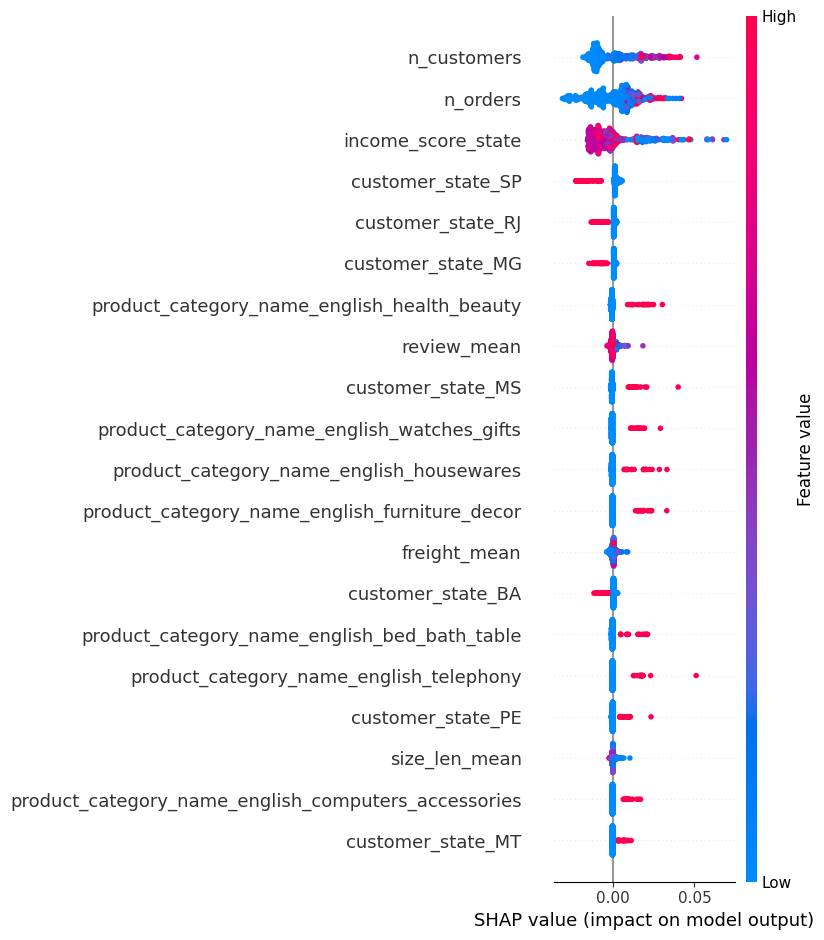

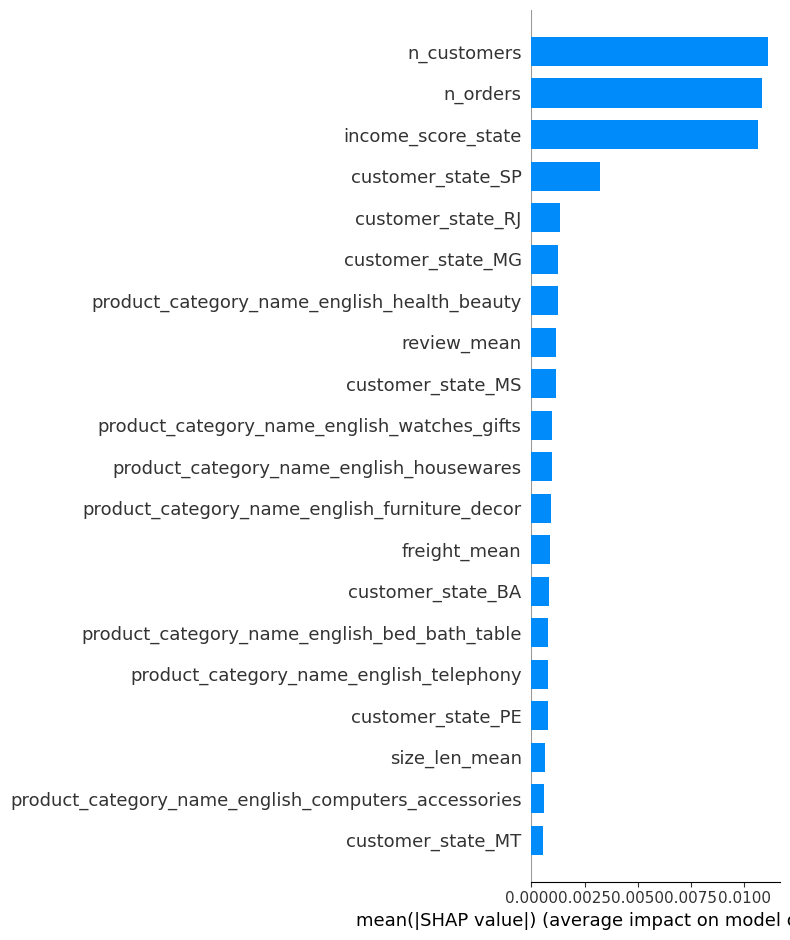

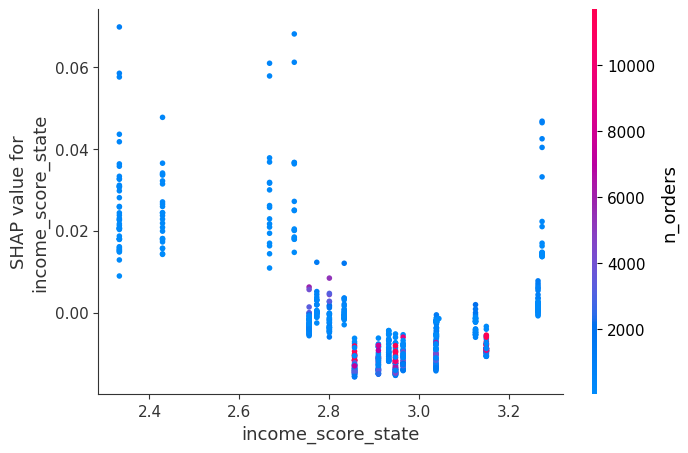

In [100]:
# Step 5) SHAP Ìï¥ÏÑù
# pip install shap  (Ìïú Î≤àÎßå)
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(X_enc)

# 5-1) Ï†ÑÏó≠ Ï§ëÏöîÎèÑ (Summary Plot)
shap.summary_plot(shap_values, features=X_enc, feature_names=feat_names, show=True)

# 5-2) ÏÉÅÏúÑ ÌîºÏ≤ò Î∞î Ï∞®Ìä∏
shap.summary_plot(shap_values, features=X_enc, feature_names=feat_names, plot_type="bar", show=True)

# 5-3) ÌäπÏ†ï ÌîºÏ≤ò ÏùòÏ°¥ÎèÑ (Ïòà: income_score_state)
shap.dependence_plot("income_score_state", shap_values, X_enc, feature_names=feat_names, show=True)


In [101]:
# Step 6) ÏòàÏ∏°Í∞í Î∂ôÏù¥Í∏∞ (ÏõêÌïòÎ©¥ Ï£º√óÏπ¥ÌÖåÍ≥†Î¶¨ ÌÖåÏù¥Î∏îÏóê y_hat Ï∂îÍ∞Ä)
y_hat = xgb_final.predict(X_enc)
train_tbl["sales_rate_pred"] = y_hat
print(train_tbl[[STATE_COL, CAT_COL, "y", "sales_rate_pred"]].head())
# train_tbl.to_csv("train_tbl_with_pred.csv", index=False)


  customer_state product_category_name_english     y  sales_rate_pred
0             AL                          auto  0.00         0.000004
1             AL                          baby  0.01         0.009485
2             AL        books_general_interest  0.05         0.049314
3             AL         computers_accessories  0.15         0.150080
4             AL                consoles_games  0.00         0.000550


In [103]:
# sales_rate_pred = Ï£ºÎ≥Ñ ÏòàÏ∏° ÌåêÎß§Ïú®
import plotly.express as px

CATEGORY_TO_MAP = "bed_bath_table"  # ÏòàÏãú: ÏãúÍ∞ÅÌôîÌïòÍ≥† Ïã∂ÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨

map_df = (
    train_tbl.loc[train_tbl[CAT_COL] == CATEGORY_TO_MAP, [STATE_COL, "sales_rate_pred"]]
              .copy()
)
map_df["sales_rate_pred"] = map_df["sales_rate_pred"].clip(0, 1)

# Î∏åÎùºÏßà Ï£º(2Í∏ÄÏûê) ÏΩîÎìúÏôÄ Ïó∞Í≤∞ÎêòÎäî GeoJSON (click_that_hood)
GEOJSON_URL = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"

fig = px.choropleth(
    map_df,
    geojson=GEOJSON_URL,
    locations=STATE_COL,                 # Ïòà: "SP","RJ"...
    featureidkey="properties.sigla",     # geojsonÏùò Ï£º ÏΩîÎìú ÌÇ§
    color="sales_rate_pred",
    color_continuous_scale="Viridis",
    range_color=(0, map_df["sales_rate_pred"].max()),
    scope="south america",
    title=f"Predicted Sales Rate by State ‚Äî {CATEGORY_TO_MAP}"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin=dict(l=0, r=0, t=50, b=0))
fig.show()


In [104]:
import plotly.express as px

topcat_by_state = (
    train_tbl
      .sort_values(["sales_rate_pred"], ascending=False)
      .groupby(STATE_COL, as_index=False)
      .first()[[STATE_COL, CAT_COL, "sales_rate_pred"]]
)

GEOJSON_URL = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"

fig = px.choropleth(
    topcat_by_state,
    geojson=GEOJSON_URL,
    locations=STATE_COL,
    featureidkey="properties.sigla",
    color=CAT_COL,                  # Ïπ¥ÌÖåÍ≥†Î¶¨(Î≤îÏ£ºÌòï) Ïª¨Îü¨ÎßÅ
    hover_data=["sales_rate_pred"],
    title="Top Predicted Category by State",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin=dict(l=0, r=0, t=50, b=0))
fig.show()


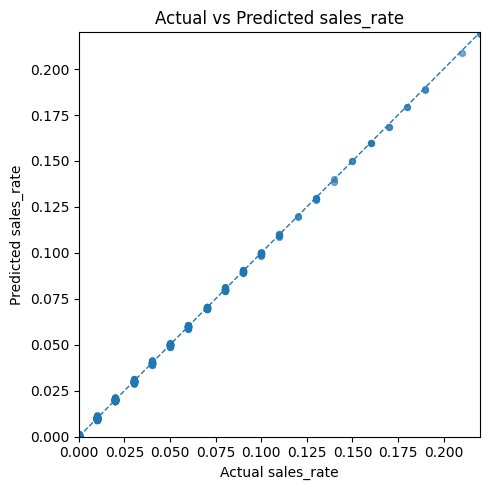

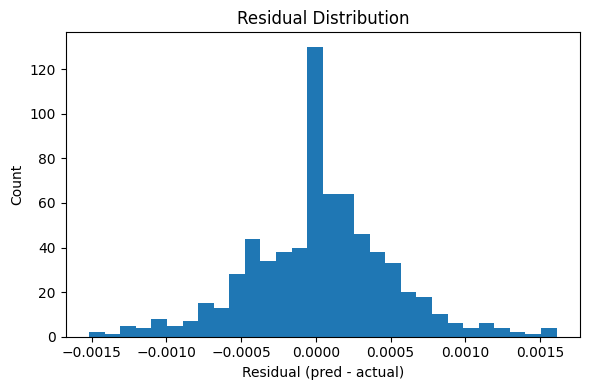

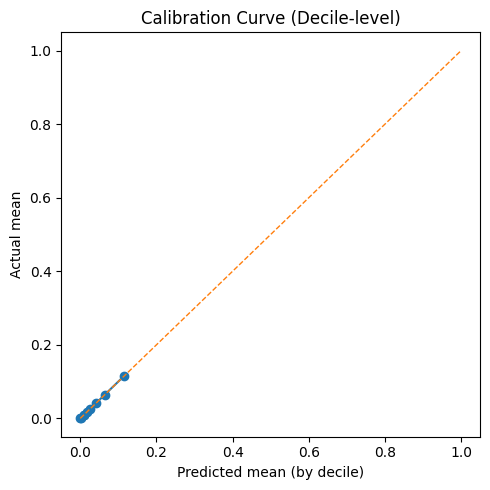

In [105]:
# (A) Í∏∞Î≥∏ ÏÑ±Îä• ÌîåÎ°Ø: Ïã§Ï†ú vs ÏòàÏ∏° ÏÇ∞Ï†êÎèÑ + ÏûîÏ∞® Î∂ÑÌè¨ + Ï∫òÎ¶¨Î∏åÎ†àÏù¥ÏÖò(ÎîîÏÇ¨Ïùº)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ï†ÑÏ†ú: train_tbl Ïóê [STATE_COL, CAT_COL, "y", "sales_rate_pred"] Ï°¥Ïû¨
STATE_COL = "customer_state"
CAT_COL   = "product_category_name_english"

viz = train_tbl.copy()
viz["sales_rate_pred"] = viz["sales_rate_pred"].clip(0, 1)

y_true = viz["y"].values
y_pred = viz["sales_rate_pred"].values
resid  = y_pred - y_true

# 1) Ïã§Ï†ú vs ÏòàÏ∏° ÏÇ∞Ï†êÎèÑ
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, alpha=0.6, s=18)
lims = [0, max(0.001, y_true.max(), y_pred.max())]
plt.plot(lims, lims, "--", linewidth=1)
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual sales_rate")
plt.ylabel("Predicted sales_rate")
plt.title("Actual vs Predicted sales_rate")
plt.tight_layout()
plt.show()

# 2) ÏûîÏ∞® ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(6,4))
plt.hist(resid, bins=30)
plt.xlabel("Residual (pred - actual)")
plt.ylabel("Count")
plt.title("Residual Distribution")
plt.tight_layout()
plt.show()

# 3) Ï∫òÎ¶¨Î∏åÎ†àÏù¥ÏÖò(ÏòàÏ∏° ÎîîÏÇ¨ÏùºÎ≥Ñ Ïã§Ï†ú ÌèâÍ∑†)
viz["pred_decile"] = pd.qcut(viz["sales_rate_pred"], 10, labels=False, duplicates="drop")
calib = viz.groupby("pred_decile", as_index=False).agg(
    pred_mean=("sales_rate_pred", "mean"),
    actual_mean=("y", "mean"),
    n=("y","size")
)
plt.figure(figsize=(5,5))
plt.plot(calib["pred_mean"], calib["actual_mean"], marker="o")
plt.plot([0,1],[0,1], "--", linewidth=1)
plt.xlabel("Predicted mean (by decile)")
plt.ylabel("Actual mean")
plt.title("Calibration Curve (Decile-level)")
plt.tight_layout()
plt.show()


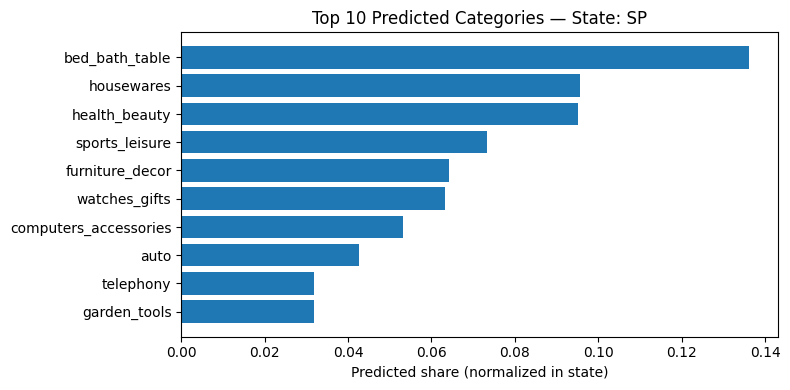

In [106]:
# (B) Ï£ºÎ≥Ñ Ï†ïÍ∑úÌôîÎêú ÏòàÏ∏° ÌåêÎß§Ïú®Î°ú ÏÉÅÏúÑ Ïπ¥ÌÖåÍ≥†Î¶¨ ÎßâÎåÄ Ï∞®Ìä∏ (ÌäπÏ†ï Ï£º ÏÑ†ÌÉù)
import matplotlib.pyplot as plt

STATE_TO_SHOW = "SP"  # ÏõêÌïòÎäî Ï£º ÏΩîÎìúÎ°ú Î≥ÄÍ≤Ω

state_df = (
    train_tbl
      .loc[train_tbl[STATE_COL] == STATE_TO_SHOW, [CAT_COL, "sales_rate_pred"]]
      .copy()
)
state_df["sales_rate_pred"] = state_df["sales_rate_pred"].clip(0,1)

# Ï£º ÎÇ¥ Ï†ïÍ∑úÌôî(ÏÑ†ÌÉù: Ìï©=1Î°ú ÎßûÏ∂îÍ≥† Ïã∂Îã§Î©¥)
sum_pred = state_df["sales_rate_pred"].sum()
if sum_pred > 0:
    state_df["pred_norm"] = state_df["sales_rate_pred"] / sum_pred
else:
    state_df["pred_norm"] = state_df["sales_rate_pred"]

topk = state_df.sort_values("pred_norm", ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.barh(topk[CAT_COL], topk["pred_norm"])
plt.gca().invert_yaxis()
plt.xlabel("Predicted share (normalized in state)")
plt.title(f"Top 10 Predicted Categories ‚Äî State: {STATE_TO_SHOW}")
plt.tight_layout()
plt.show()


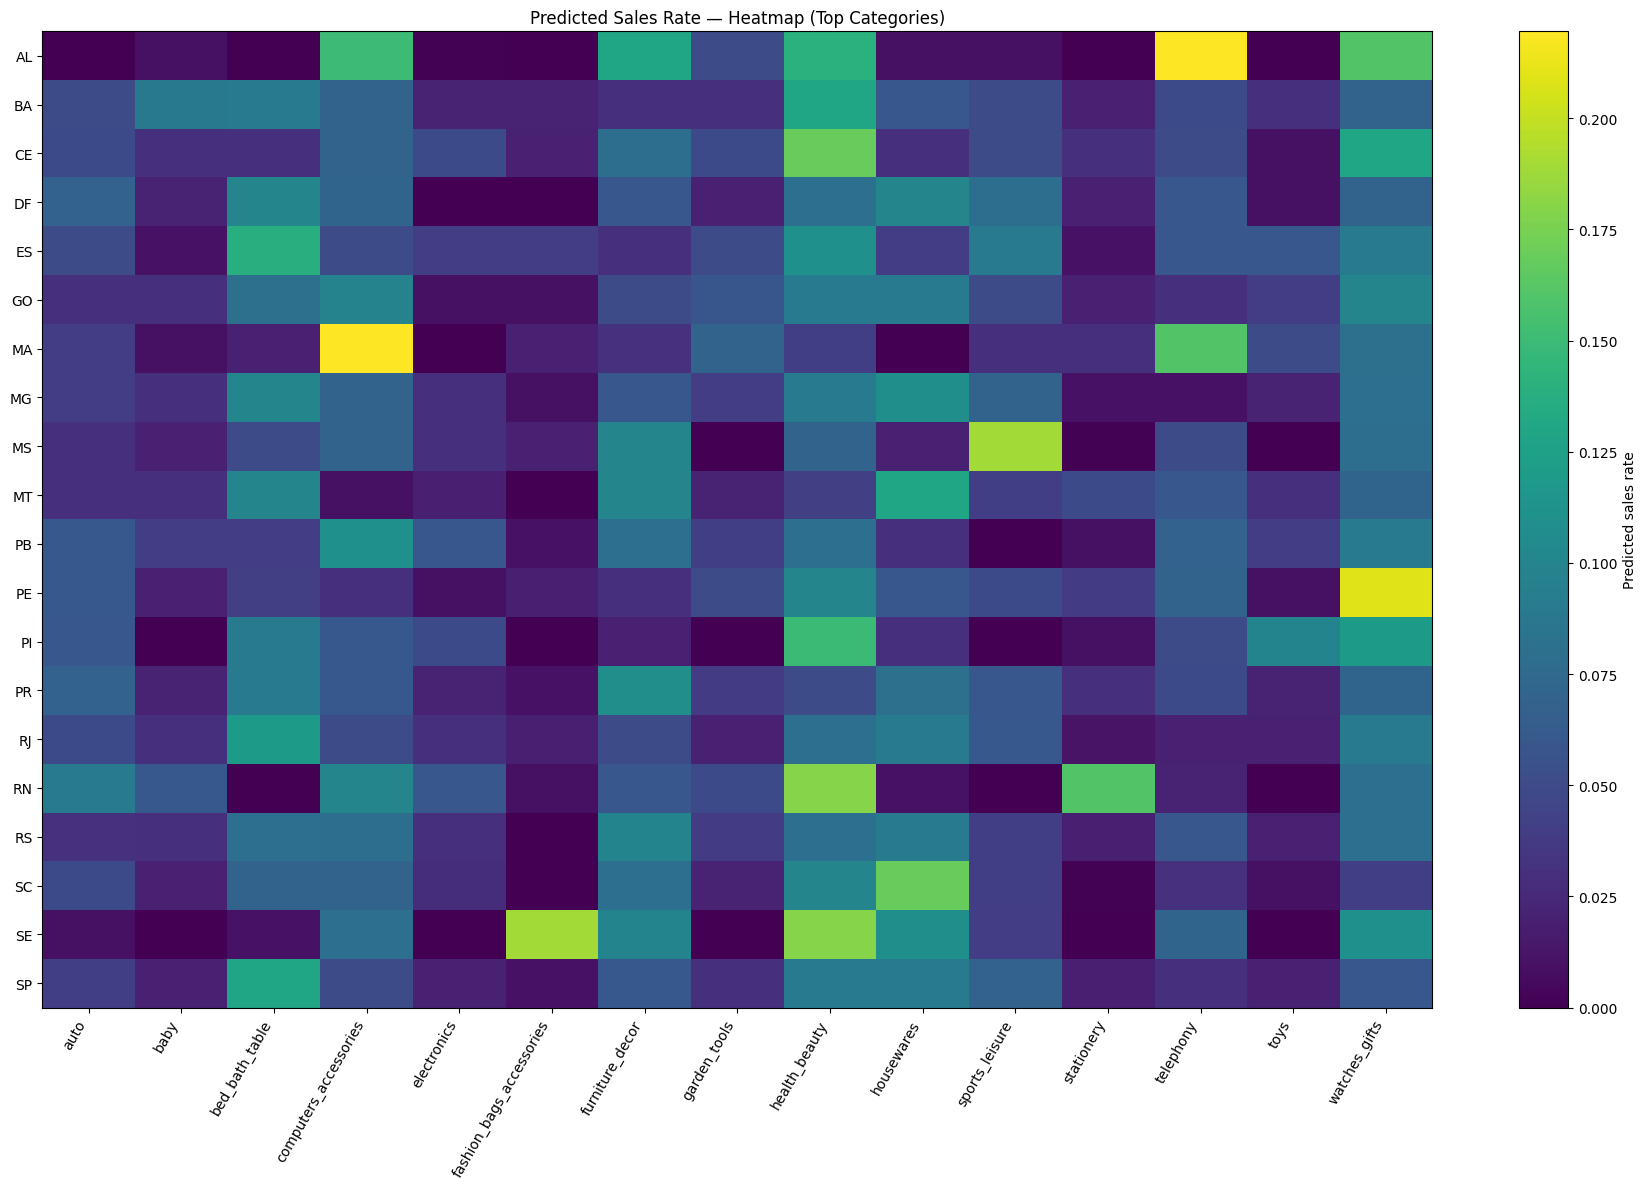

In [109]:
# (C) Ï£º√óÏπ¥ÌÖåÍ≥†Î¶¨ ÌûàÌä∏Îßµ(ÌîºÎ≤ó) ‚Äî ÏòàÏ∏° ÌåêÎß§Ïú® ÏãúÍ∞Å ÏöîÏïΩ
#  - Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä ÎßéÏúºÎ©¥ ÏÉÅÏúÑ NÍ∞úÎßå ÌëúÏãú Ï∂îÏ≤ú
import matplotlib.pyplot as plt

N_CAT = 15  # ÏÉÅÏúÑ NÍ∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ ÌëúÏãú
top_cats = (
    train_tbl.groupby(CAT_COL)["sales_rate_pred"].sum()
             .sort_values(ascending=False).head(N_CAT).index
)
pvt = (
    train_tbl[train_tbl[CAT_COL].isin(top_cats)]
      .pivot(index=STATE_COL, columns=CAT_COL, values="sales_rate_pred")
      .fillna(0.0)
)

plt.figure(figsize=(1.2*len(top_cats), 0.5*len(pvt.index)+2))
# seaborn ÏóÜÏù¥ Í∞ÑÎã®Ìïú Ïù¥ÎØ∏ÏßÄ ÌîåÎ°Ø
plt.imshow(pvt.values, aspect="auto")
plt.colorbar(label="Predicted sales rate")
plt.yticks(range(len(pvt.index)), pvt.index)
plt.xticks(range(len(pvt.columns)), pvt.columns, rotation=60, ha="right")
plt.title("Predicted Sales Rate ‚Äî Heatmap (Top Categories)")
plt.tight_layout()
plt.show()


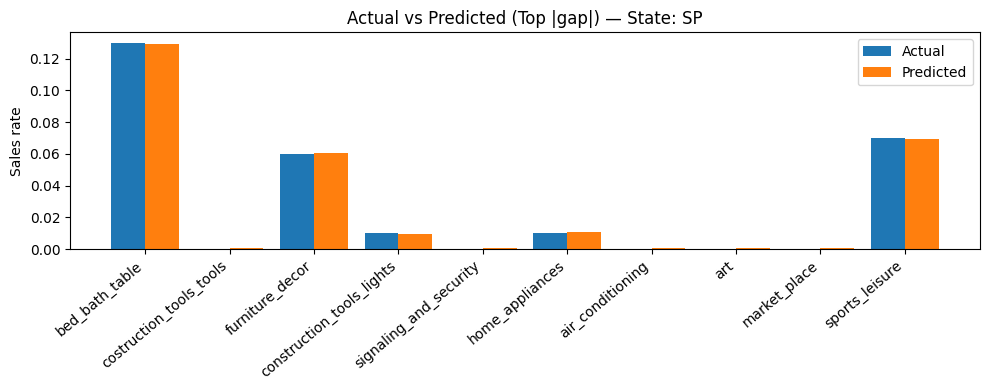

In [111]:
# (D) Ïã§Ï†ú vs ÏòàÏ∏° ÎπÑÍµê Î∞îÏ∞®Ìä∏ ‚Äî ÌäπÏ†ï Ï£ºÏóêÏÑú ÏÉÅÏúÑ Ïπ¥ÌÖåÍ≥†Î¶¨
import matplotlib.pyplot as plt

STATE_TO_SHOW = "SP"  # ÏõêÌïòÎäî Ï£ºÎ°ú Î≥ÄÍ≤Ω

cmp = (
    train_tbl.loc[train_tbl[STATE_COL] == STATE_TO_SHOW, [CAT_COL, "y", "sales_rate_pred"]]
             .copy()
)
cmp["sales_rate_pred"] = cmp["sales_rate_pred"].clip(0,1)
cmp["gap"] = cmp["sales_rate_pred"] - cmp["y"]

top_abs_gap = cmp.reindex(cmp["gap"].abs().sort_values(ascending=False).head(10).index)

x = np.arange(len(top_abs_gap))
w = 0.4

plt.figure(figsize=(10,4))
plt.bar(x - w/2, top_abs_gap["y"], width=w, label="Actual")
plt.bar(x + w/2, top_abs_gap["sales_rate_pred"], width=w, label="Predicted")
plt.xticks(x, top_abs_gap[CAT_COL], rotation=40, ha="right")
plt.ylabel("Sales rate")
plt.title(f"Actual vs Predicted (Top |gap|) ‚Äî State: {STATE_TO_SHOW}")
plt.legend()
plt.tight_layout()
plt.show()


In [113]:
# === Regression metrics + Confusion Matrices (binary & multiclass) ===
import numpy as np
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    confusion_matrix, classification_report, root_mean_squared_error
)

# 1) ÌöåÍ∑Ä ÏòàÏ∏°Ïπò
y_pred = xgb_final.predict(X_enc)
y_pred = np.clip(y_pred, 0.0, 1.0)   # ÎπÑÏú® ÌÉÄÍπÉ Í∞ÄÎìú

# 2) ÌöåÍ∑Ä ÏÑ±Îä• ÏßÄÌëú
rmse = root_mean_squared_error(y, y_pred)
mae  = mean_absolute_error(y, y_pred)
r2   = r2_score(y, y_pred)

print(f"[Regression] RMSE={rmse:.6f} | MAE={mae:.6f} | R^2={r2:.6f}")

# --------------------------------------------------------------------
# 3) Confusion Matrix (Binary): ÌåêÎß§Ïú®ÏùÑ 'ÎÜíÏùå/ÎÇÆÏùå'ÏúºÎ°ú Ïù¥ÏßÑÌôî
#    - Í∏∞Î≥∏: Ïã§Ï†úÍ∞íÏùò Ï§ëÏïôÍ∞íÏùÑ Í∏∞Ï§Ä ÏûÑÍ≥ÑÍ∞íÏúºÎ°ú ÏÇ¨Ïö© (ÏõêÌïòÎ©¥ ÏÇ¨Ïö©Ïûê Ï†ïÏùòÎ°ú Î≥ÄÍ≤Ω)
# --------------------------------------------------------------------
THRESHOLD = float(np.median(y))  # ÏÇ¨Ïö©Ïûê Ï†ïÏùò: Ïòà) 0.05 Îì±ÏúºÎ°ú ÍµêÏ≤¥ Í∞ÄÎä•

y_true_bin = (y >= THRESHOLD).astype(int)
y_pred_bin = (y_pred >= THRESHOLD).astype(int)

cm_bin = confusion_matrix(y_true_bin, y_pred_bin, labels=[0, 1])
print("\n[Binary] Threshold =", THRESHOLD)
print("Confusion Matrix (rows=true, cols=pred) [labels: 0=Low, 1=High]:\n", cm_bin)
print("\nClassification report (binary):\n",
      classification_report(y_true_bin, y_pred_bin, target_names=["Low","High"], digits=4))

# --------------------------------------------------------------------
# 4) Confusion Matrix (Multiclass A‚ÄìD): ÏÇ¨Î∂ÑÏúÑÏàò Í∏∞Ï§Ä 4Îì±Í∏â
#    - D (Í∞ÄÏû• ÎÇÆÏùå) ~ A (Í∞ÄÏû• ÎÜíÏùå)
# --------------------------------------------------------------------
q1, q2, q3 = np.quantile(y, [0.25, 0.5, 0.75])

def to_quartile_label(v):
    if v <= q1:      return "D"
    elif v <= q2:    return "C"
    elif v <= q3:    return "B"
    else:            return "A"

y_true_q = np.array([to_quartile_label(v) for v in y])
y_pred_q = np.array([to_quartile_label(v) for v in y_pred])

labels_q = ["A","B","C","D"]  # Î≥¥Í≥† ÏàúÏÑú: ÎÜíÏùÄ Îì±Í∏â ‚Üí ÎÇÆÏùÄ Îì±Í∏â
cm_q = confusion_matrix(y_true_q, y_pred_q, labels=labels_q)

print("\n[Multiclass A‚ÄìD] Quartile cut points:",
      f"Q1={q1:.6f}, Q2={q2:.6f}, Q3={q3:.6f}")
print("Confusion Matrix (rows=true, cols=pred) [labels: A,B,C,D]:\n", cm_q)
print("\nClassification report (A‚ÄìD):\n",
      classification_report(y_true_q, y_pred_q, labels=labels_q, digits=4))

[Regression] RMSE=0.000476 | MAE=0.000348 | R^2=0.999836

[Binary] Threshold = 0.01
Confusion Matrix (rows=true, cols=pred) [labels: 0=Low, 1=High]:
 [[214   2]
 [ 80 398]]

Classification report (binary):
               precision    recall  f1-score   support

         Low     0.7279    0.9907    0.8392       216
        High     0.9950    0.8326    0.9066       478

    accuracy                         0.8818       694
   macro avg     0.8614    0.9117    0.8729       694
weighted avg     0.9119    0.8818    0.8856       694


[Multiclass A‚ÄìD] Quartile cut points: Q1=0.000000, Q2=0.010000, Q3=0.040000
Confusion Matrix (rows=true, cols=pred) [labels: A,B,C,D]:
 [[164   1   0   0]
 [ 13 148   3   0]
 [  0  74  77   0]
 [  0   0 138  76]]

Classification report (A‚ÄìD):
               precision    recall  f1-score   support

           A     0.9266    0.9939    0.9591       165
           B     0.6637    0.9024    0.7649       164
           C     0.3532    0.5099    0.4173       151


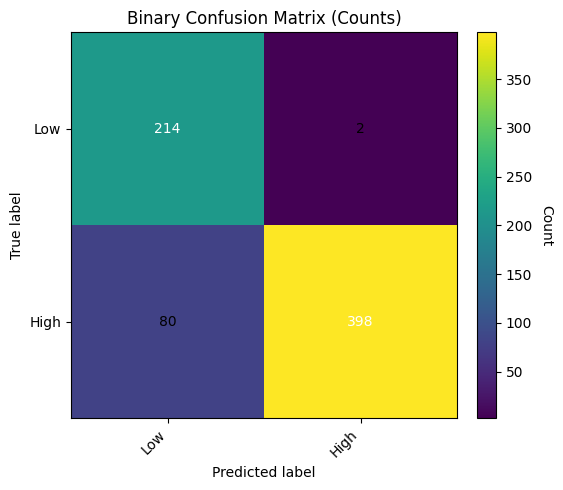

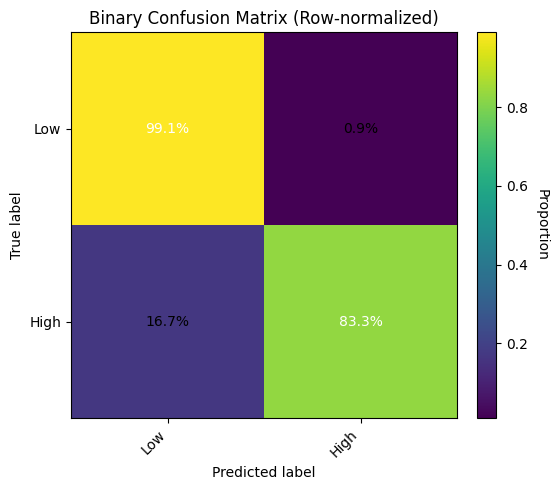

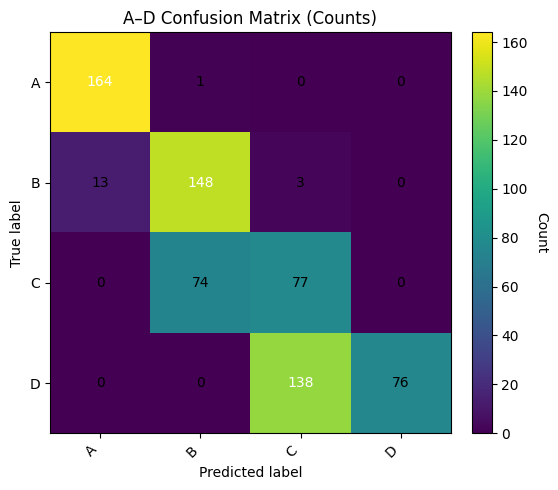

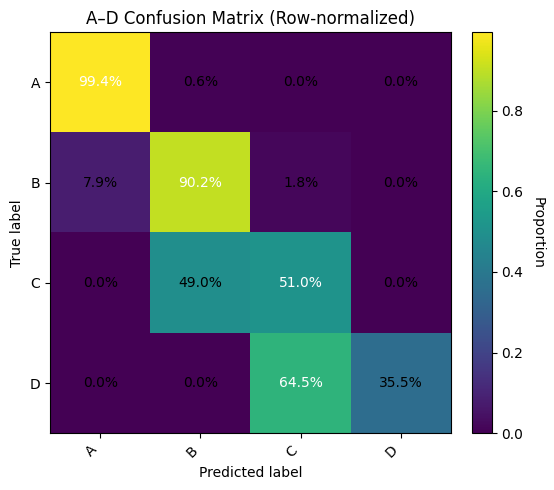

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title="Confusion Matrix", normalize=None):
    """
    cm: 2D numpy array (from sklearn.metrics.confusion_matrix)
    labels: list of class labels (order must match cm)
    normalize: None | 'true' | 'pred' | 'all'
      - None  : raw counts
      - 'true': row-normalized (recall)
      - 'pred': column-normalized (precision)
      - 'all' : overall percentage
    """
    cm = cm.astype(float)
    disp = cm.copy()

    if normalize == 'true':
        row_sums = cm.sum(axis=1, keepdims=True)
        disp = np.divide(cm, np.where(row_sums == 0, 1, row_sums))
    elif normalize == 'pred':
        col_sums = cm.sum(axis=0, keepdims=True)
        disp = np.divide(cm, np.where(col_sums == 0, 1, col_sums))
    elif normalize == 'all':
        total = cm.sum()
        disp = cm / (total if total != 0 else 1)

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(disp)

    ax.set_title(title)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels)

    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("Proportion" if normalize else "Count", rotation=270, labelpad=15)

    # annotate
    thresh = disp.max() / 2.0 if disp.size else 0.5
    for i in range(disp.shape[0]):
        for j in range(disp.shape[1]):
            txt = f"{disp[i, j]:.1%}" if normalize else f"{int(cm[i, j])}"
            ax.text(j, i, txt, ha="center", va="center",
                    color="white" if disp[i, j] > thresh else "black")

    ax.set_ylim(disp.shape[0]-0.5, -0.5)
    plt.tight_layout()
    plt.show()


# -----------------------------
# ÏÇ¨Ïö© ÏòàÏãú (ÏúÑÏóêÏÑú ÎßåÎì† cm_bin, cm_q Ïû¨ÏÇ¨Ïö©)
# -----------------------------

# Binary CM
labels_bin = ["Low", "High"]
plot_confusion_matrix(cm_bin, labels_bin, title="Binary Confusion Matrix (Counts)", normalize=None)
plot_confusion_matrix(cm_bin, labels_bin, title="Binary Confusion Matrix (Row-normalized)", normalize="true")

# Multiclass A‚ÄìD CM
labels_ad = ["A", "B", "C", "D"]
plot_confusion_matrix(cm_q, labels_ad, title="A‚ÄìD Confusion Matrix (Counts)", normalize=None)
plot_confusion_matrix(cm_q, labels_ad, title="A‚ÄìD Confusion Matrix (Row-normalized)", normalize="true")


ÌÅ¥ÎûòÏä§Î≥Ñ ÏßÄÌëú Ìï¥ÏÑù üìä
Precision (Ï†ïÎ∞ÄÎèÑ): Î™®Îç∏Ïù¥ ÌäπÏ†ï ÌÅ¥ÎûòÏä§Î°ú ÏòàÏ∏°Ìïú ÏÉòÌîå Ï§ë Ïã§Ï†ú Ï†ïÎãµÏù∏ ÎπÑÏú®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

* A (0.9266): 'A'Î°ú ÏòàÏ∏°Ìïú ÏÉòÌîå Ï§ë 92.66%Í∞Ä Ïã§Ï†úÎ°ú 'A'ÏòÄÏäµÎãàÎã§.

* D (1.0000): 'D'Î°ú ÏòàÏ∏°Ìïú Î™®Îì† ÏÉòÌîåÏù¥ Ïã§Ï†úÎ°ú 'D'ÏòÄÏäµÎãàÎã§. Ï¶â, 'D'Î°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Í≤ΩÏö∞Í∞Ä ÏóÜÏóàÏäµÎãàÎã§.

* C (0.3532): 'C'Î°ú ÏòàÏ∏°Ìïú ÏÉòÌîå Ï§ë 35.32%ÎßåÏù¥ Ïã§Ï†ú 'C'ÏòÄÏäµÎãàÎã§. 'C'Î°ú ÏòàÏ∏°Ìïú Í≤É Ï§ë Ïò§ÎãµÏù¥ ÎßéÏïòÎã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§.

Recall (Ïû¨ÌòÑÏú®): Ïã§Ï†ú ÌäπÏ†ï ÌÅ¥ÎûòÏä§Ïóê ÏÜçÌïòÎäî ÏÉòÌîå Ï§ë Î™®Îç∏Ïù¥ Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°Ìïú ÎπÑÏú®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

* A (0.9939): Ïã§Ï†ú 'A'Ïù∏ Î™®Îì† ÏÉòÌîå Ï§ë 99.39%Î•º Î™®Îç∏Ïù¥ 'A'Î°ú Ï†ïÌôïÌûà Ï∞æÏïÑÎÉàÏäµÎãàÎã§.

* D (0.3551): Ïã§Ï†ú 'D'Ïù∏ ÏÉòÌîå Ï§ë 35.51%Îßå 'D'Î°ú Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°ÌñàÏäµÎãàÎã§. Ïã§Ï†ú 'D'Ïù∏ ÏÉòÌîåÏùÑ 'D'Í∞Ä ÏïÑÎãå Îã§Î•∏ ÌÅ¥ÎûòÏä§Î°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Í≤ΩÏö∞Í∞Ä ÎßéÏïòÎã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§.

F1-score: Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïùò Ï°∞Ìôî ÌèâÍ∑†ÏúºÎ°ú, Îëê ÏßÄÌëúÍ∞Ä Î™®Îëê ÎÜíÏïÑÏïº ÎÜíÏùÄ Í∞íÏùÑ Í∞ÄÏßëÎãàÎã§. Î™®Îç∏Ïùò Í∑†ÌòïÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÎäî Îç∞ Ïú†Ïö©Ìï©ÎãàÎã§.

* A (0.9591): Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïù¥ Î™®Îëê ÎÜíÏïÑ F1-scoreÍ∞Ä Îß§Ïö∞ ÎÜíÏäµÎãàÎã§.

* D (0.5241): Ï†ïÎ∞ÄÎèÑÎäî ÎÜíÏßÄÎßå Ïû¨ÌòÑÏú®Ïù¥ ÎÇÆÏïÑ F1-scoreÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏäµÎãàÎã§.

Support (ÏßÄÏõê): Í∞Å ÌÅ¥ÎûòÏä§Ïùò Ïã§Ï†ú ÏÉòÌîå ÏàòÏûÖÎãàÎã§.

* Î¶¨Ìè¨Ìä∏ ÎÇ¥ Ï¥ù 694Í∞úÏùò ÏÉòÌîå Ï§ë 'A' ÌÅ¥ÎûòÏä§Îäî 165Í∞ú, 'B'Îäî 164Í∞ú, 'C'Îäî 151Í∞ú, 'D'Îäî 214Í∞úÏòÄÏäµÎãàÎã§.

Ï¢ÖÌï© ÏßÄÌëú Ìï¥ÏÑù üìä
* Accuracy (Ï†ïÌôïÎèÑ): Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Î™®Îç∏Ïù¥ Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°Ìïú ÎπÑÏú®ÏûÖÎãàÎã§. Ïù¥ Î™®Îç∏ÏùÄ Ï†ÑÏ≤¥ ÏÉòÌîåÏùò 67%Î•º Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•òÌñàÏäµÎãàÎã§.

* Macro Avg (Îß§ÌÅ¨Î°ú ÌèâÍ∑†): Í∞Å ÌÅ¥ÎûòÏä§ ÏßÄÌëúÏùò Îã®Ïàú ÌèâÍ∑†ÏûÖÎãàÎã§. Í∞Å ÌÅ¥ÎûòÏä§Ïùò Ï§ëÏöîÎèÑÍ∞Ä ÎèôÏùºÌïòÎã§Í≥† Í∞ÄÏ†ïÌï† Îïå ÏÇ¨Ïö©Ìï©ÎãàÎã§.

* Weighted Avg (Í∞ÄÏ§ë ÌèâÍ∑†): Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÏÉòÌîå Ïàò(support)Î•º Í∞ÄÏ§ëÏπòÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ ÌèâÍ∑†ÏùÑ ÎÇ∏ Í∞íÏûÖÎãàÎã§. ÏÉòÌîå ÏàòÍ∞Ä ÎßéÏùÄ ÌÅ¥ÎûòÏä§Ïùò ÏÑ±Îä•Ïù¥ Ï†ÑÏ≤¥ ÌèâÍ∑†Ïóê Îçî ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§.

Í≤∞Î°† üìù
* Ïù¥ Î™®Îç∏ÏùÄ 'A' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ÏÑúÎäî Îß§Ïö∞ Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥ÏßÄÎßå, 'C'ÏôÄ 'D' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ÏÑúÎäî ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥ÏßëÎãàÎã§.
* ÌäπÌûà, 'D' ÌÅ¥ÎûòÏä§Îäî **Ï†ïÎ∞ÄÎèÑ(Precision)Îäî 100%**Î°ú Îß§Ïö∞ ÎÜíÏßÄÎßå **Ïû¨ÌòÑÏú®(Recall)ÏùÄ 35.51%**Î°ú Îß§Ïö∞ ÎÇÆÏäµÎãàÎã§.
* Ïù¥Îäî Î™®Îç∏Ïù¥ 'D'ÎùºÍ≥† ÏòàÏ∏°ÌïòÎ©¥ Í±∞Ïùò Ï†ïÌôïÌïòÏßÄÎßå, Ïã§Ï†ú 'D'Ïù∏ ÏÉòÌîåÏùÑ Ï†úÎåÄÎ°ú Ï∞æÏïÑÎÇ¥ÏßÄ Î™ªÌïòÎäî Î¨∏Ï†úÍ∞Ä ÏûàÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Î∞òÎåÄÎ°ú 'C' ÌÅ¥ÎûòÏä§Îäî Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïù¥ Î™®Îëê ÎÇÆÏïÑ Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÑ±Îä•Ïù¥ Ï¢ãÏßÄ ÏïäÏùåÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.